# Imports

In [3]:
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Análisis exploratorio de datos

In [4]:
df_movies_modified = pd.read_csv('movies_dataset_modified.csv')

In [5]:
df_movies_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45346 non-null  int64  
 2   genres                 45346 non-null  object 
 3   id                     45346 non-null  int64  
 4   original_language      45335 non-null  object 
 5   overview               44405 non-null  object 
 6   popularity             45346 non-null  float64
 7   production_companies   45346 non-null  object 
 8   production_countries   45346 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45346 non-null  float64
 11  runtime                45100 non-null  float64
 12  spoken_languages       45346 non-null  object 
 13  status                 45266 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

In [6]:
df_movies_modified.describe()

budget             id    popularity       revenue       runtime  \
count  4.534600e+04   45346.000000  45346.000000  4.534600e+04  45100.000000   
mean   4.232580e+06  108042.219645      2.926188  1.123366e+07     94.177805   
std    1.744373e+07  112187.326746      6.010970  6.440990e+07     38.348775   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26390.250000      0.388732  0.000000e+00     85.000000   
50%    0.000000e+00   59852.500000      1.130176  0.000000e+00     95.000000   
75%    0.000000e+00  156601.500000      3.689337  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count          year        return  
count  45346.000000  45346.000000  45346.000000  4.534600e+04  
mean       5.624196    110.135293   1991.882834  6.604792e+02  
std        1.915339    491.899276     24.053040  7.471800e+04  
min        0.000000      0.000000   1874.000000  0.000000e+00  
25%        5.000000      3.000000   1978.000000  0.000000e+00  
50%        6.000000     10.000000   2001.000000  0.000000e+00  
75%        6.800000     34.000000   2010.000000  0.000000e+00  
max       10.000000  14075.000000   2020.000000  1.239638e+07

## Revisión de valores nulos por cada columna (caracteristica)

In [7]:
df_movies_modified.isnull().sum()

belongs_to_collection    40861
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24959
title                        0
vote_average                 0
vote_count                   0
year                         0
return                       0
month                        0
day                          0
dtype: int64

In [8]:
df_movies_modified.isna().sum()

belongs_to_collection    40861
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24959
title                        0
vote_average                 0
vote_count                   0
year                         0
return                       0
month                        0
day                          0
dtype: int64

## Outliers

### Budget

<Axes: ylabel='budget'>

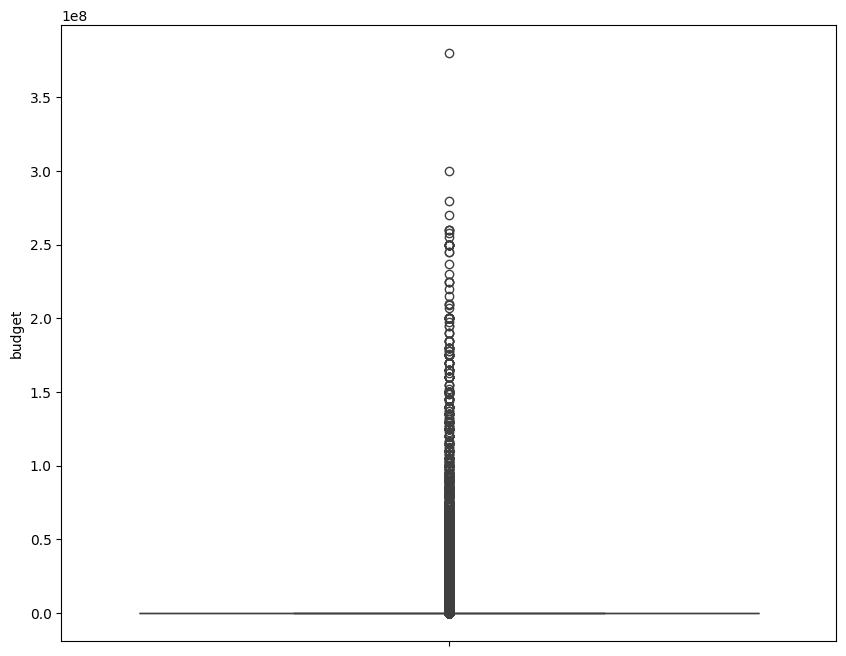

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified, y='budget')

In [10]:
q1_budget = df_movies_modified['budget'].quantile(0.25)
q2_budget = df_movies_modified['budget'].quantile(0.50)
q3_budget = df_movies_modified['budget'].quantile(0.75)
q4_budget = df_movies_modified['budget'].quantile(1.00)
iqr_budget = q3_budget - q1_budget

print("Q1:", q1_budget)
print("Q2:", q2_budget)
print("Q3:", q3_budget)
print("Q4:", q4_budget)
print("IQR:", iqr_budget)

Q1: 0.0
Q2: 0.0
Q3: 0.0
Q4: 380000000.0
IQR: 0.0


In [11]:
print("Cantidad de datos en la columna budget:", df_movies_modified['budget'].count())
print("Cantidad de ceros en la columna budget:", df_movies_modified[df_movies_modified['budget'] == 0]['budget'].count())
print("Cantidad de datos que no son cero en la columna budget:", df_movies_modified[df_movies_modified['budget'] != 0]['budget'].count())
print("El pocentaje de ceros en la columna budget es:", round((df_movies_modified[df_movies_modified['budget'] == 0]['budget'].count() / df_movies_modified['budget'].count()) * 100, 2), "%")
print("El porcentaje de datos que no son cero en la columna budget es:", round((df_movies_modified[df_movies_modified['budget'] != 0]['budget'].count() / df_movies_modified['budget'].count()) * 100, 2), "%")

Cantidad de datos en la columna budget: 45346
Cantidad de ceros en la columna budget: 36470
Cantidad de datos que no son cero en la columna budget: 8876
El pocentaje de ceros en la columna budget es: 80.43 %
El porcentaje de datos que no son cero en la columna budget es: 19.57 %


El bloque de codigo anterior muestra porque la grafica de boxplot y las funciones de quartiles dan 0, y esto es gracias a que un poco más de 80% de los datos en la columna budget son 0.

### Popularity

<Axes: ylabel='popularity'>

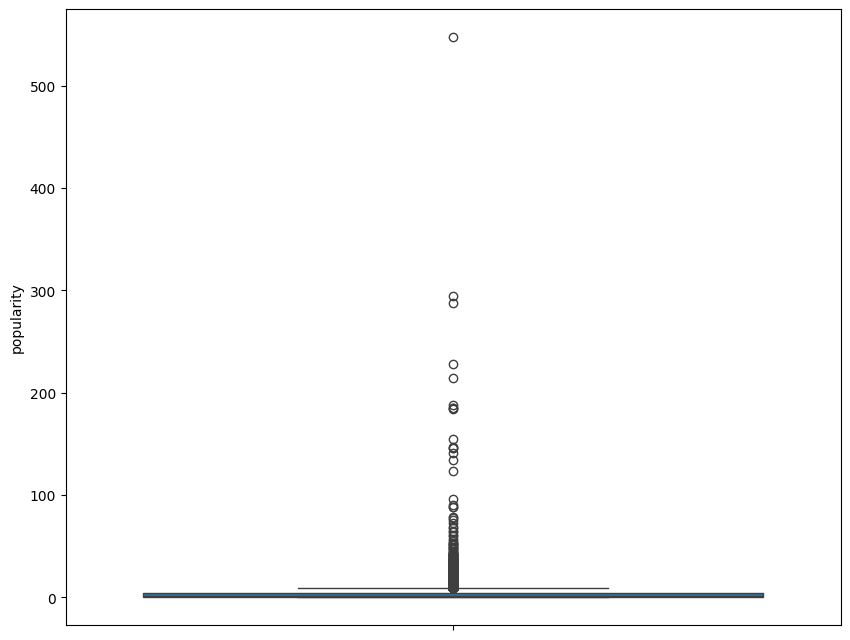

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified, y='popularity')

<Axes: ylabel='popularity'>

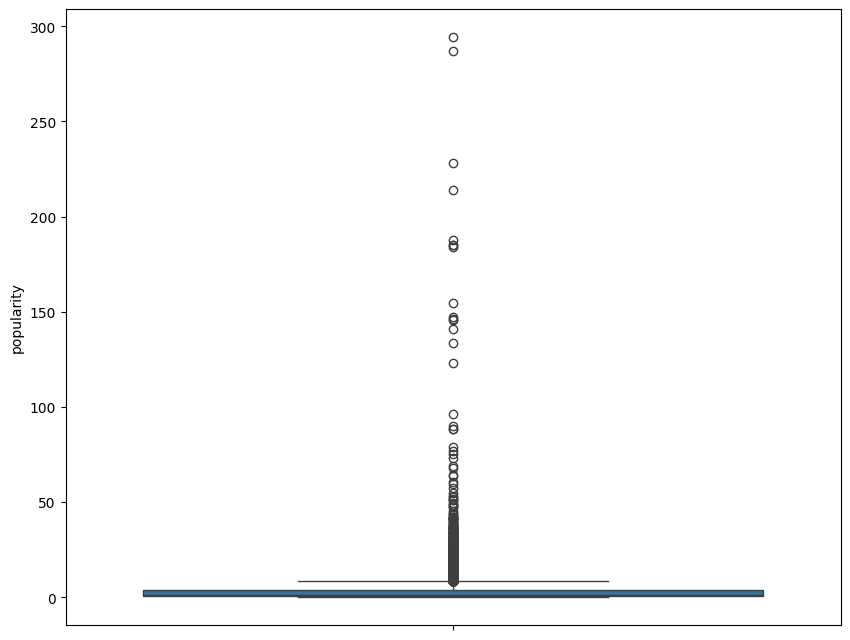

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['popularity'] != max(df_movies_modified['popularity'])], y='popularity')

<Axes: ylabel='popularity'>

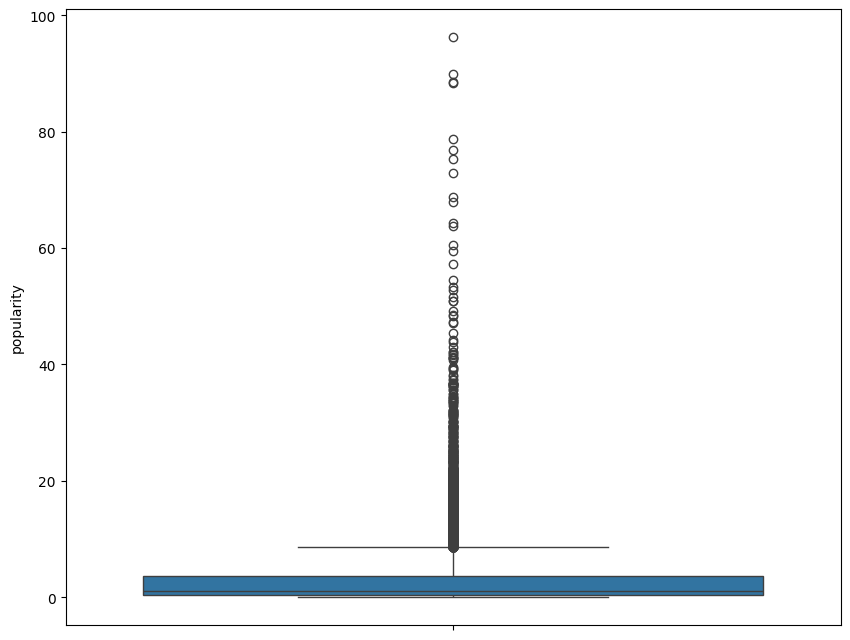

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['popularity'] < 100], y='popularity')

<Axes: ylabel='popularity'>

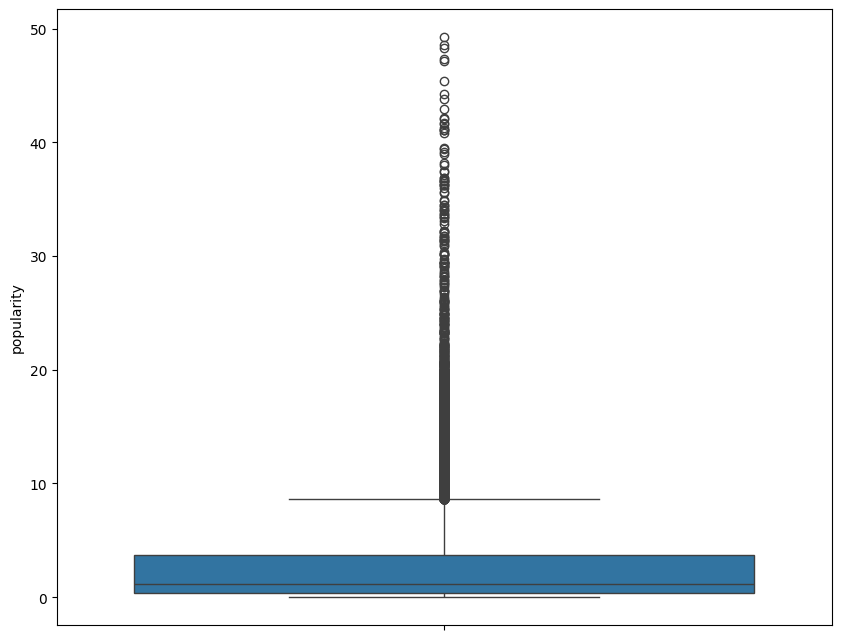

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['popularity'] < 50], y='popularity')

<Axes: ylabel='popularity'>

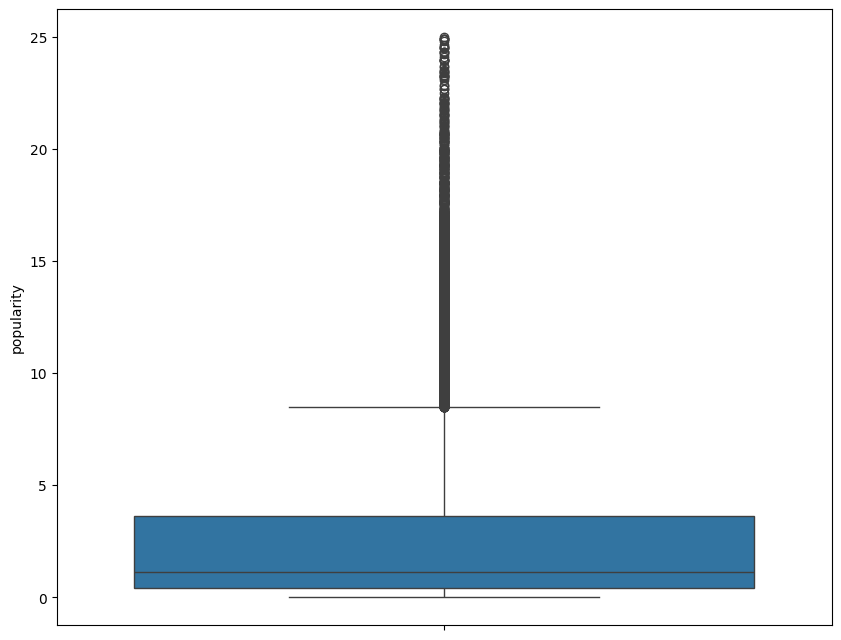

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['popularity'] < 25], y='popularity')

In [17]:
q1_popularity = df_movies_modified['popularity'].quantile(0.25)
q2_popularity = df_movies_modified['popularity'].quantile(0.50)
q3_popularity = df_movies_modified['popularity'].quantile(0.75)
q4_popularity = df_movies_modified['popularity'].quantile(1.00)
iqr_popularity = q3_popularity - q1_popularity

outliers_popularity_up = q3_popularity + 1.5 * iqr_popularity

print("Q1:", q1_popularity)
print("Q2:", q2_popularity)
print("Q3:", q3_popularity)
print("Q4:", q4_popularity)
print("IQR:", iqr_popularity)

Q1: 0.38873225
Q2: 1.130176
Q3: 3.6893365
Q4: 547.488298
IQR: 3.30060425


In [18]:
print(f"Valores mayores a {outliers_popularity_up} en la columna popularity:", df_movies_modified[df_movies_modified['popularity'] > outliers_popularity_up]['popularity'].count())
print(f"Valores menores o igales a {outliers_popularity_up} en la columna popularity:", df_movies_modified[df_movies_modified['popularity'] <= outliers_popularity_up]['popularity'].count())
print(f"Porcentaje de valores mayores a {outliers_popularity_up} en la columna popularity:", round((df_movies_modified[df_movies_modified['popularity'] > outliers_popularity_up]['popularity'].count() / df_movies_modified['popularity'].count()) * 100, 2), "%")
print(f"Porcentaje de valores menores o iguales a {outliers_popularity_up} en la columna popularity:", round((df_movies_modified[df_movies_modified['popularity'] <= outliers_popularity_up]['popularity'].count() / df_movies_modified['popularity'].count()) * 100, 2), "%")

Valores mayores a 8.640242875 en la columna popularity: 4210
Valores menores o igales a 8.640242875 en la columna popularity: 41136
Porcentaje de valores mayores a 8.640242875 en la columna popularity: 9.28 %
Porcentaje de valores menores o iguales a 8.640242875 en la columna popularity: 90.72 %


Con los bloques de codigo anterior se puede saber que hay un poco más de 9% de valores que son outliers en la columna popularity, y que son un total de 4210 valores considerados outliers. 

### Runtime

<Axes: ylabel='runtime'>

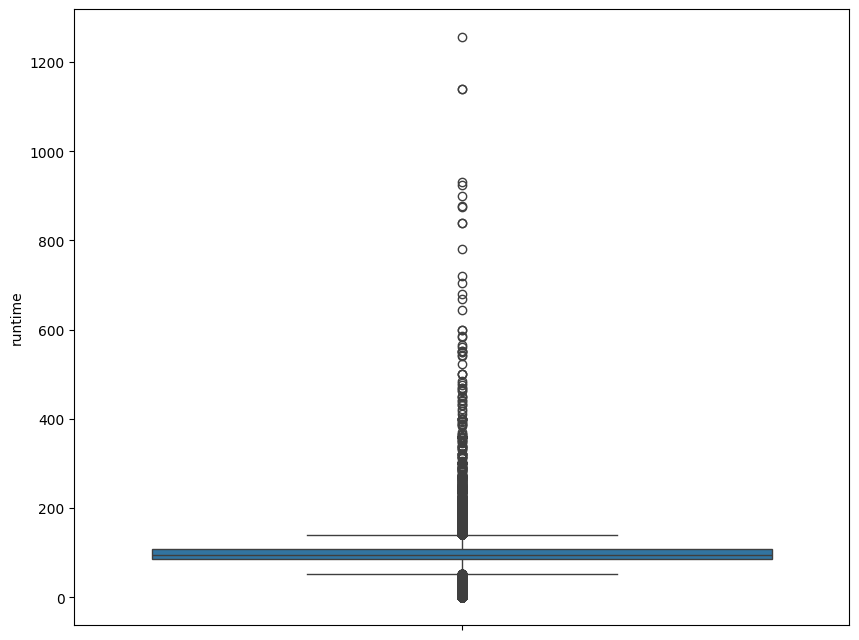

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified, y='runtime')

<Axes: ylabel='runtime'>

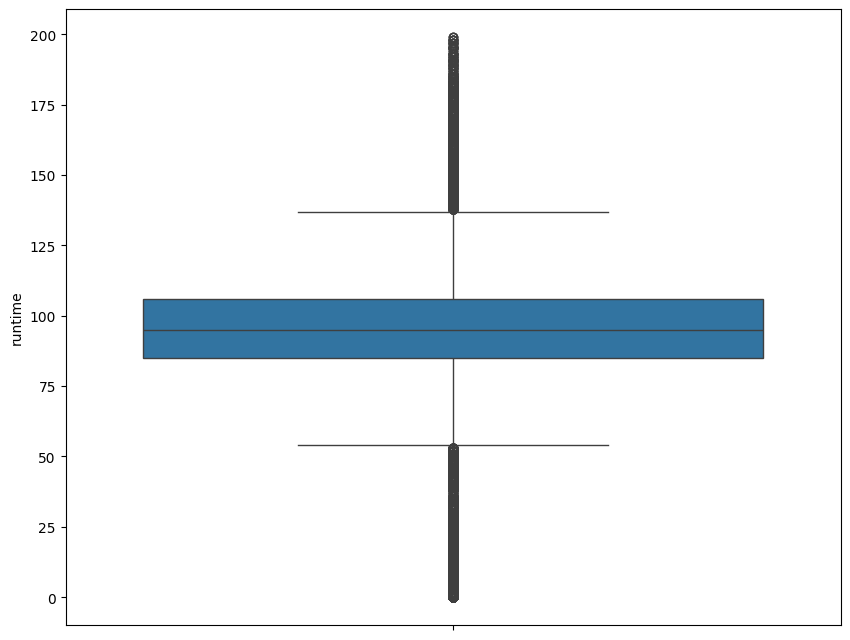

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['runtime'] < 200], y='runtime')

In [21]:
q1_runtime = df_movies_modified['runtime'].quantile(0.25)
q2_runtime = df_movies_modified['runtime'].quantile(0.50)
q3_runtime = df_movies_modified['runtime'].quantile(0.75)
q4_runtime = df_movies_modified['runtime'].quantile(1.00)
iqr_runtime = q3_runtime - q1_runtime

outliers_runtime_up = q3_runtime + 1.5 * iqr_runtime
outliers_runtime_down = q1_runtime - 1.5 * iqr_runtime

print("Q1:", q1_runtime)
print("Q2:", q2_runtime)
print("Q3:", q3_runtime)
print("Q4:", q4_runtime)
print("IQR:", iqr_runtime)

Q1: 85.0
Q2: 95.0
Q3: 107.0
Q4: 1256.0
IQR: 22.0


In [22]:
cantidad_valores_mayores = df_movies_modified[df_movies_modified['runtime'] > outliers_runtime_up]['runtime'].count()
cantidad_valores_menores = df_movies_modified[df_movies_modified['runtime'] < outliers_runtime_down]['runtime'].count()
cantidad_valores_entre = df_movies_modified[(df_movies_modified['runtime'] > outliers_runtime_up) | (df_movies_modified['runtime'] < outliers_runtime_down)]['runtime'].count()

print(f"Cantidad de valores mayores a {outliers_runtime_up} en la columna runtime:", cantidad_valores_mayores)
print(f"Cantidad de valores menores a {outliers_runtime_down} en la columna runtime:", cantidad_valores_menores)
print(f"Cantidad de valores mayores a {outliers_runtime_up} y menores a {outliers_runtime_down} en la columna runtime:", cantidad_valores_entre)
print(f"Porcentaje de valores mayores a {outliers_runtime_up} en la columna runtime:", round((cantidad_valores_mayores / df_movies_modified['runtime'].count()) * 100, 2), "%")
print(f"Porcentaje de valores menores a {outliers_runtime_down} en la columna runtime:", round((cantidad_valores_menores / df_movies_modified['runtime'].count()) * 100, 2), "%")
print(f"Porcentaje de valores mayores a {outliers_runtime_up} y menores a {outliers_runtime_down} en la columna runtime:", round((cantidad_valores_entre / df_movies_modified['runtime'].count()) * 100, 2), "%")

Cantidad de valores mayores a 140.0 en la columna runtime: 1959
Cantidad de valores menores a 52.0 en la columna runtime: 3427
Cantidad de valores mayores a 140.0 y menores a 52.0 en la columna runtime: 5386
Porcentaje de valores mayores a 140.0 en la columna runtime: 4.34 %
Porcentaje de valores menores a 52.0 en la columna runtime: 7.6 %
Porcentaje de valores mayores a 140.0 y menores a 52.0 en la columna runtime: 11.94 %


Los bloques de codigo anteriores muestran cuantos outliers hay en la columna runtime, que son aproximadamente un 12% del total de datos.

### Vote average

<Axes: ylabel='vote_average'>

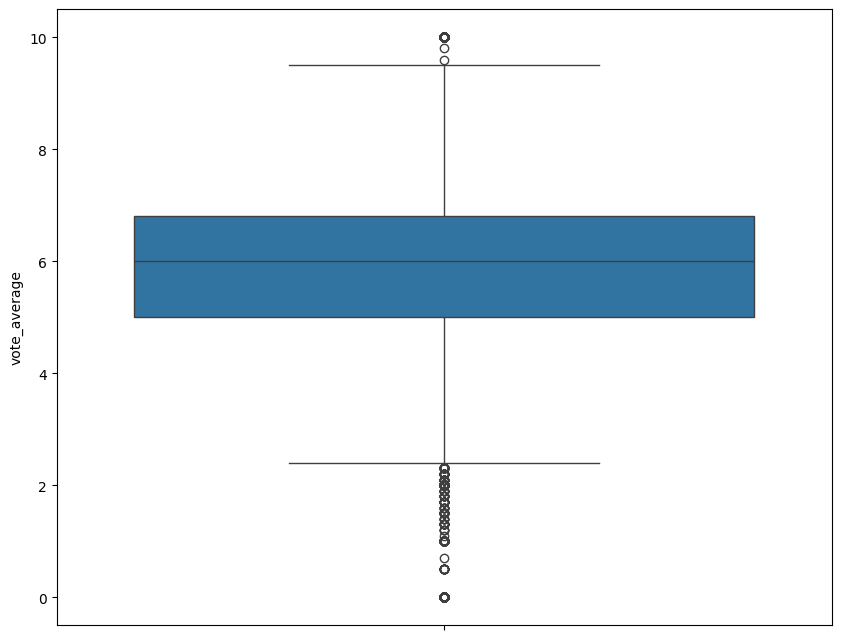

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified, y='vote_average')

In [24]:
q1_vote_average = df_movies_modified['vote_average'].quantile(0.25)
q2_vote_average = df_movies_modified['vote_average'].quantile(0.50)
q3_vote_average = df_movies_modified['vote_average'].quantile(0.75)
q4_vote_average = df_movies_modified['vote_average'].quantile(1.00)
iqr_vote_average = q3_vote_average - q1_vote_average

outliers_vote_average_up = q3_vote_average + 1.5 * iqr_vote_average
outliers_vote_average_down = q1_vote_average - 1.5 * iqr_vote_average

print("Q1:", q1_vote_average)
print("Q2:", q2_vote_average)
print("Q3:", q3_vote_average)
print("Q4:", q4_vote_average)
print("IQR:", iqr_vote_average)

Q1: 5.0
Q2: 6.0
Q3: 6.8
Q4: 10.0
IQR: 1.7999999999999998


In [25]:
cantidad_valores_mayores = df_movies_modified[df_movies_modified['vote_average'] > outliers_vote_average_up]['vote_average'].count()
cantidad_valores_menores = df_movies_modified[df_movies_modified['vote_average'] < outliers_vote_average_down]['vote_average'].count()
cantidad_valores_entre = df_movies_modified[(df_movies_modified['vote_average'] > outliers_vote_average_up) | (df_movies_modified['vote_average'] < outliers_vote_average_down)]['vote_average'].count()

print(f"Cantidad de valores mayores a {outliers_vote_average_up} en la columna vote_average:", cantidad_valores_mayores)
print(f"Cantidad de valores menores a {outliers_vote_average_down} en la columna vote_average:", cantidad_valores_menores)
print(f"Cantidad de valores mayores a {outliers_vote_average_up} y menores a {outliers_vote_average_down} en la columna vote_average:", cantidad_valores_entre)
print(f"Porcentaje de valores mayores a {outliers_vote_average_up} en la columna vote_average:", round((cantidad_valores_mayores / df_movies_modified['vote_average'].count()) * 100, 2), "%")
print(f"Porcentaje de valores menores a {outliers_vote_average_down} en la columna vote_average:", round((cantidad_valores_menores / df_movies_modified['vote_average'].count()) * 100, 2), "%")
print(f"Porcentaje de valores mayores a {outliers_vote_average_up} y menores a {outliers_vote_average_down} en la columna vote_average:", round((cantidad_valores_entre / df_movies_modified['vote_average'].count()) * 100, 2), "%")

Cantidad de valores mayores a 9.5 en la columna vote_average: 187
Cantidad de valores menores a 2.3000000000000003 en la columna vote_average: 3353
Cantidad de valores mayores a 9.5 y menores a 2.3000000000000003 en la columna vote_average: 3540
Porcentaje de valores mayores a 9.5 en la columna vote_average: 0.41 %
Porcentaje de valores menores a 2.3000000000000003 en la columna vote_average: 7.39 %
Porcentaje de valores mayores a 9.5 y menores a 2.3000000000000003 en la columna vote_average: 7.81 %


Los anteriores bloques de codigo muestran cuantos valores son considerados como outliers, que son aproximadamente un 8% del total de los datos. Sin embargo ninguno de los datos es menor a 0 o mayor a 10, lo que demuestra que todas las calificaciones son congruentes ya que lo máximo que puede tener una pelicula es 10, y así mismo lo mínimo que puede tener una pelicula es 0.

### Vote count

<Axes: ylabel='vote_count'>

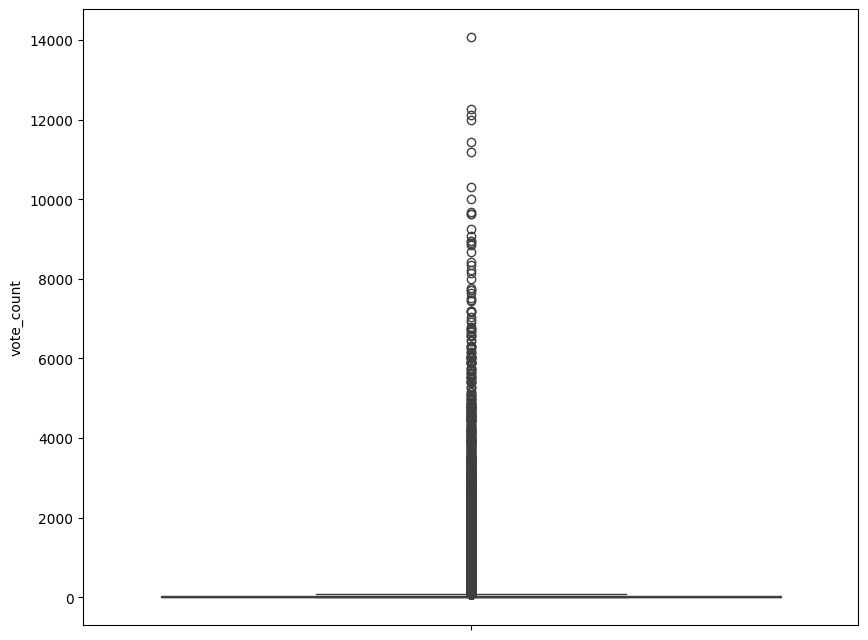

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified, y='vote_count')

<Axes: ylabel='vote_count'>

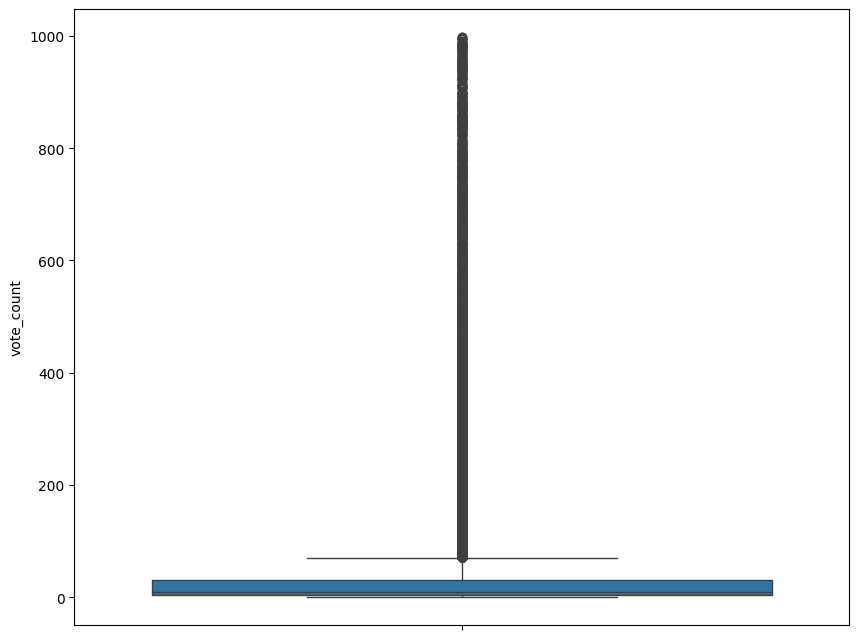

In [27]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['vote_count'] < 1000], y='vote_count')

<Axes: ylabel='vote_count'>

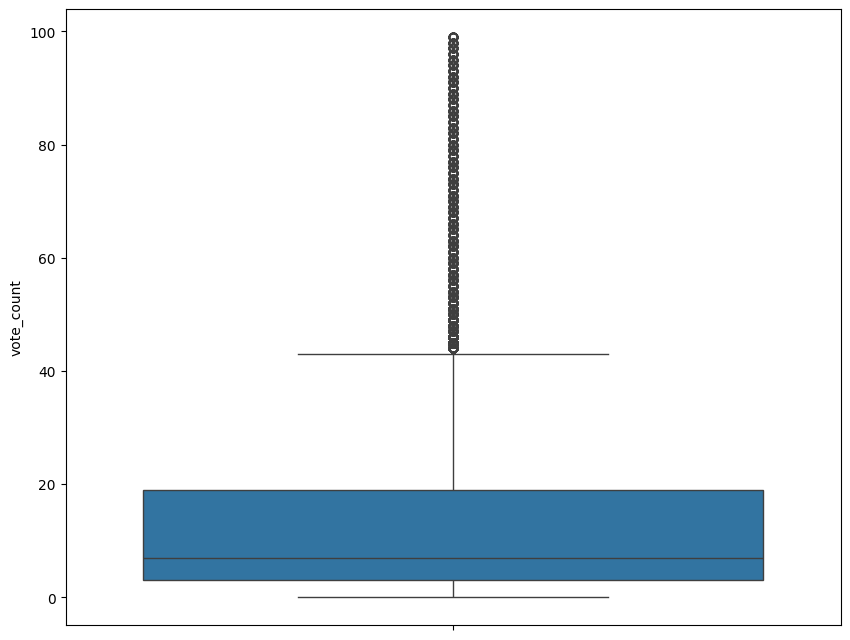

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified[df_movies_modified['vote_count'] < 100], y='vote_count')

In [29]:
q1_vote_count = df_movies_modified['vote_count'].quantile(0.25)
q2_vote_count = df_movies_modified['vote_count'].quantile(0.50)
q3_vote_count = df_movies_modified['vote_count'].quantile(0.75)
q4_vote_count = df_movies_modified['vote_count'].quantile(1.00)
iqr_vote_count = q3_vote_count - q1_vote_count

outliers_vote_count_up = q3_vote_count + 1.5 * iqr_vote_count
outliers_vote_count_down = q1_vote_count - 1.5 * iqr_vote_count

print("Q1:", q1_vote_count)
print("Q2:", q2_vote_count)
print("Q3:", q3_vote_count)
print("Q4:", q4_vote_count)
print("IQR:", iqr_vote_count)

Q1: 3.0
Q2: 10.0
Q3: 34.0
Q4: 14075.0
IQR: 31.0


In [30]:
cantidad_valores_menores = df_movies_modified[df_movies_modified['vote_count'] < outliers_vote_count_down]['vote_count'].count()
cantidad_valores_mayores = df_movies_modified[df_movies_modified['vote_count'] > outliers_vote_count_up]['vote_count'].count()
cantidad_valores_entre = df_movies_modified[(df_movies_modified['vote_count'] < outliers_vote_count_down) | (df_movies_modified['vote_count'] > outliers_vote_count_up)]['vote_count'].count()

print(f"Cantidad de valores menores a {outliers_vote_count_down} en la columna vote_count:", cantidad_valores_menores)
print(f"Cantidad de valores mayores a {outliers_vote_count_up} en la columna vote_count:", cantidad_valores_mayores)
print(f"Cantidad de valores menores a {outliers_vote_count_down} y mayores a {outliers_vote_count_up} en la columna vote_count:", cantidad_valores_entre)
print(f"Porcentaje de valores menores a {outliers_vote_count_down} en la columna vote_count:", round((cantidad_valores_menores / df_movies_modified['vote_count'].count()) * 100, 2), "%")
print(f"Porcentaje de valores mayores a {outliers_vote_count_up} en la columna vote_count:", round((cantidad_valores_mayores / df_movies_modified['vote_count'].count()) * 100, 2), "%")
print(f"Porcentaje de valores menores a {outliers_vote_count_down} y mayores a {outliers_vote_count_up} en la columna vote_count:", round((cantidad_valores_entre / df_movies_modified['vote_count'].count()) * 100, 2), "%")

Cantidad de valores menores a -43.5 en la columna vote_count: 0
Cantidad de valores mayores a 80.5 en la columna vote_count: 6881
Cantidad de valores menores a -43.5 y mayores a 80.5 en la columna vote_count: 6881
Porcentaje de valores menores a -43.5 en la columna vote_count: 0.0 %
Porcentaje de valores mayores a 80.5 en la columna vote_count: 15.17 %
Porcentaje de valores menores a -43.5 y mayores a 80.5 en la columna vote_count: 15.17 %


Los bloques de codigo anteriores muestran la cantidad de valores outliers que tiene la columna vote_count. Aunque se podría decir que hay aproximadamente un 15% de valores outliers, no se podría concluir esto ya que en la cantidad de votos si se puede tener o ningún voto o muchos.

### Year

<Axes: ylabel='year'>

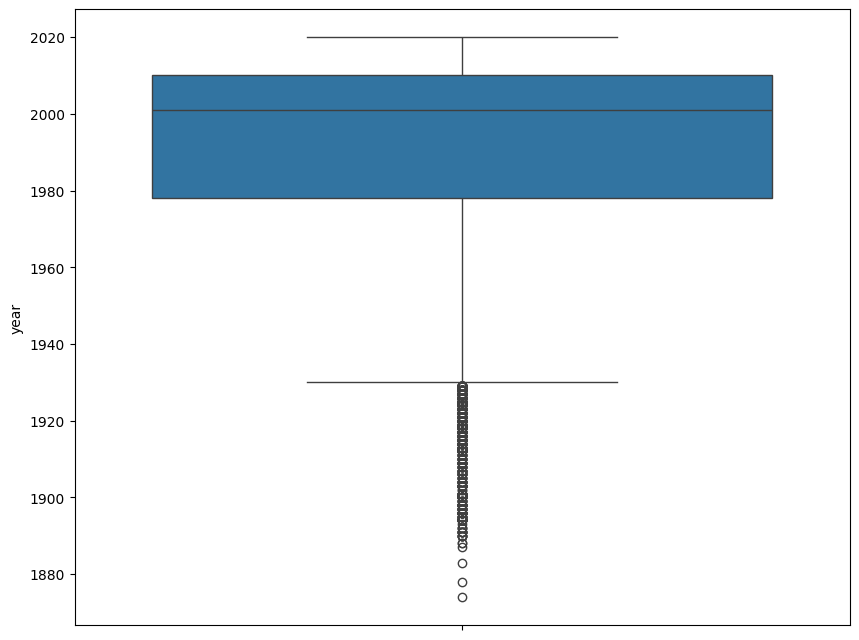

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_movies_modified, y='year')

In [32]:
q1_year = df_movies_modified['year'].quantile(0.25)
q2_year = df_movies_modified['year'].quantile(0.50)
q3_year = df_movies_modified['year'].quantile(0.75)
q4_year = df_movies_modified['year'].quantile(1.00)
iqr_year = q3_year - q1_year

outliers_year_up = q3_year + 1.5 * iqr_year
outliers_year_down = q1_year - 1.5 * iqr_year

print("Q1:", q1_year)
print("Q2:", q2_year)
print("Q3:", q3_year)
print("Q4:", q4_year)
print("IQR:", iqr_year)

Q1: 1978.0
Q2: 2001.0
Q3: 2010.0
Q4: 2020.0
IQR: 32.0


In [33]:
cantidad_valores_menores = df_movies_modified[df_movies_modified['year'] < outliers_year_down]['year'].count()
cantidad_valores_mayores = df_movies_modified[df_movies_modified['year'] > outliers_year_up]['year'].count()
cantidad_valores_entre = df_movies_modified[(df_movies_modified['year'] < outliers_year_down) | (df_movies_modified['year'] > outliers_year_up)]['year'].count()

print(f"Cantidad de valores menores a {outliers_year_down} en la columna year:", cantidad_valores_menores)
print(f"Cantidad de valores mayores a {outliers_year_up} en la columna year:", cantidad_valores_mayores)
print(f"Cantidad de valores menores a {outliers_year_down} y mayores a {outliers_year_up} en la columna year:", cantidad_valores_entre)
print(f"Porcentaje de valores menores a {outliers_year_down} en la columna year:", round((cantidad_valores_menores / df_movies_modified['year'].count()) * 100, 2), "%")
print(f"Porcentaje de valores mayores a {outliers_year_up} en la columna year:", round((cantidad_valores_mayores / df_movies_modified['year'].count()) * 100, 2), "%")
print(f"Porcentaje de valores menores a {outliers_year_down} y mayores a {outliers_year_up} en la columna year:", round((cantidad_valores_entre / df_movies_modified['year'].count()) * 100, 2), "%")

Cantidad de valores menores a 1930.0 en la columna year: 775
Cantidad de valores mayores a 2058.0 en la columna year: 0
Cantidad de valores menores a 1930.0 y mayores a 2058.0 en la columna year: 775
Porcentaje de valores menores a 1930.0 en la columna year: 1.71 %
Porcentaje de valores mayores a 2058.0 en la columna year: 0.0 %
Porcentaje de valores menores a 1930.0 y mayores a 2058.0 en la columna year: 1.71 %


Los bloques de codigo anteriores muestran la cantidad de años que son condiderados outliers. Aunque dice que hay 775 años considerados como outliers, no se podrían tener en cuenta como outliers ya que la pelicula más vieja es del año 1895, y esta cantidad de outliers es considerando que la pelicula fue lanzada antes de 1930.

### Revenue y Return

Para estas columnas no se realizo el proceso de detección de outliers ya que la columna de budget y revenue muestra que la mayoria de los valores son 0 y por lo tanto casi todos los valores son considerados outliers.

## Análisis de distribución

### Budget

<Axes: xlabel='budget', ylabel='Count'>

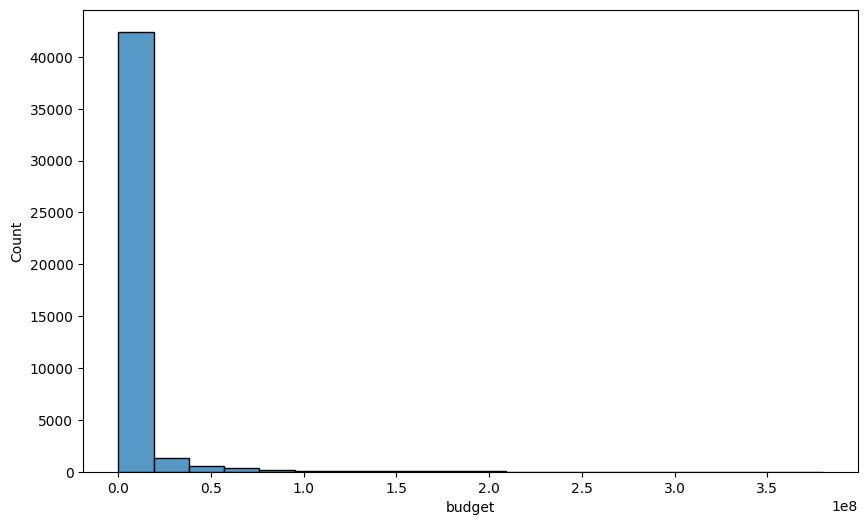

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df_movies_modified['budget'], bins = 20)

La anterior imagen muestra la disctribución de los datos de la columna budget. Esta confirma que la mayoria de los datos son ceros, ya que el eje y muesta la cantidad de valores y el eje x muestra los valores que hay en la columna budget ordenados de menor a mayor.

### Original Language

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88],
 [Text(0, 0, 'en'),
  Text(1, 0, 'fr'),
  Text(2, 0, 'zh'),
  Text(3, 0, 'it'),
  Text(4, 0, 'fa'),
  Text(5, 0, 'nl'),
  Text(6, 0, 'de'),
  Text(7, 0, 'cn'),
  Text(8, 0, 'ar'),
  Text(9, 0, 'es'),
  Text(10, 0, 'ru'),
  Text(11, 0, 'sv'),
  Text(12, 0, 'ja'),
  Text(13, 0, 'ko'),
  Text(14, 0, 'sr'),
  Text(15, 0, 'bn'),
  Text(16, 0, 'he'),
  Text(17, 0, 'pt'),
  Text(18, 0, 'wo'),
  Text(19, 0, 'ro'),
  Text(20, 0, 'hu'),
  Text(21, 0, 'cy'),
  Text(22, 0, 'vi'),
  

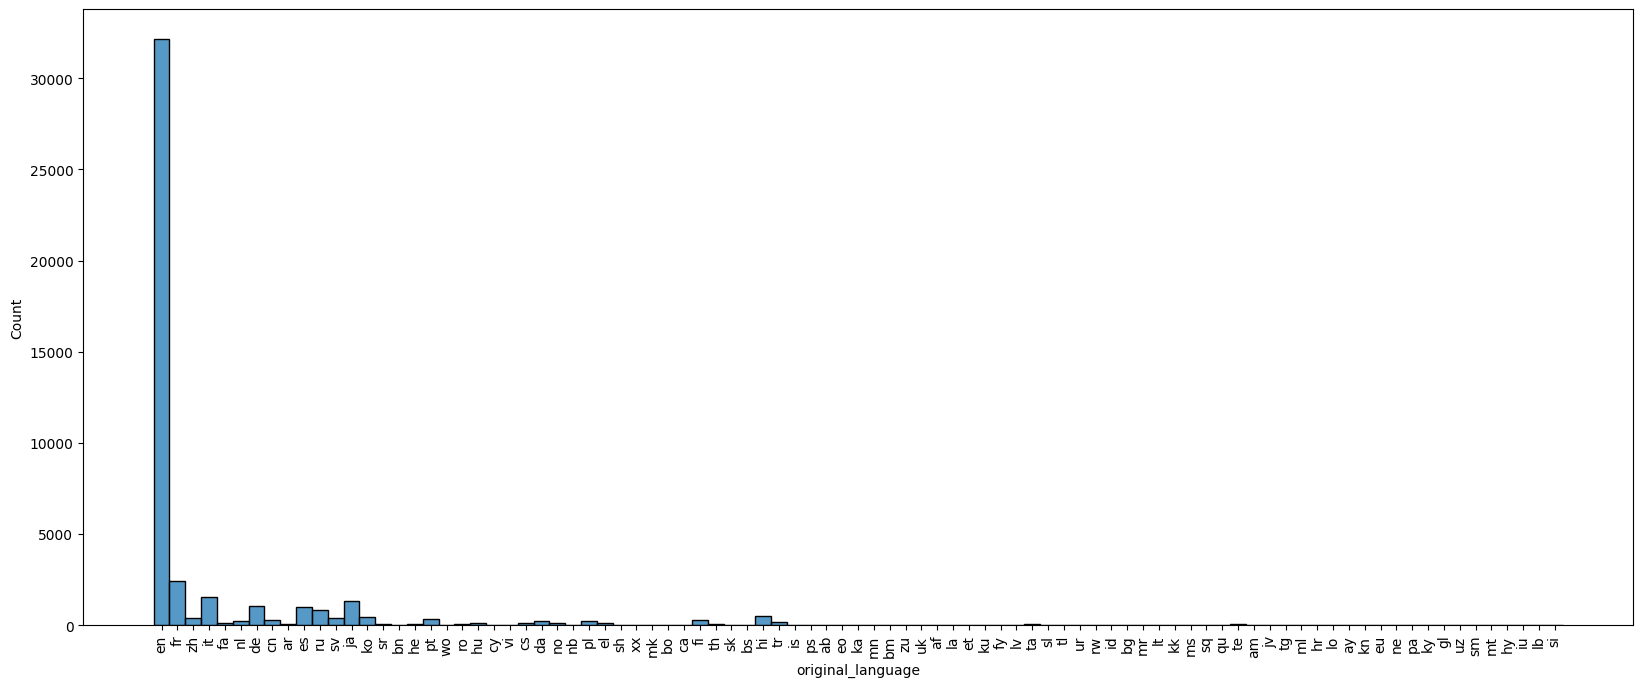

In [35]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['original_language'])
plt.xticks(rotation=90)

La imagen anterior demuestra que la mayoria de las peliculas que tiene el dataset tienen como idioma original el inglés.

### Popularity

<Axes: xlabel='popularity', ylabel='Count'>

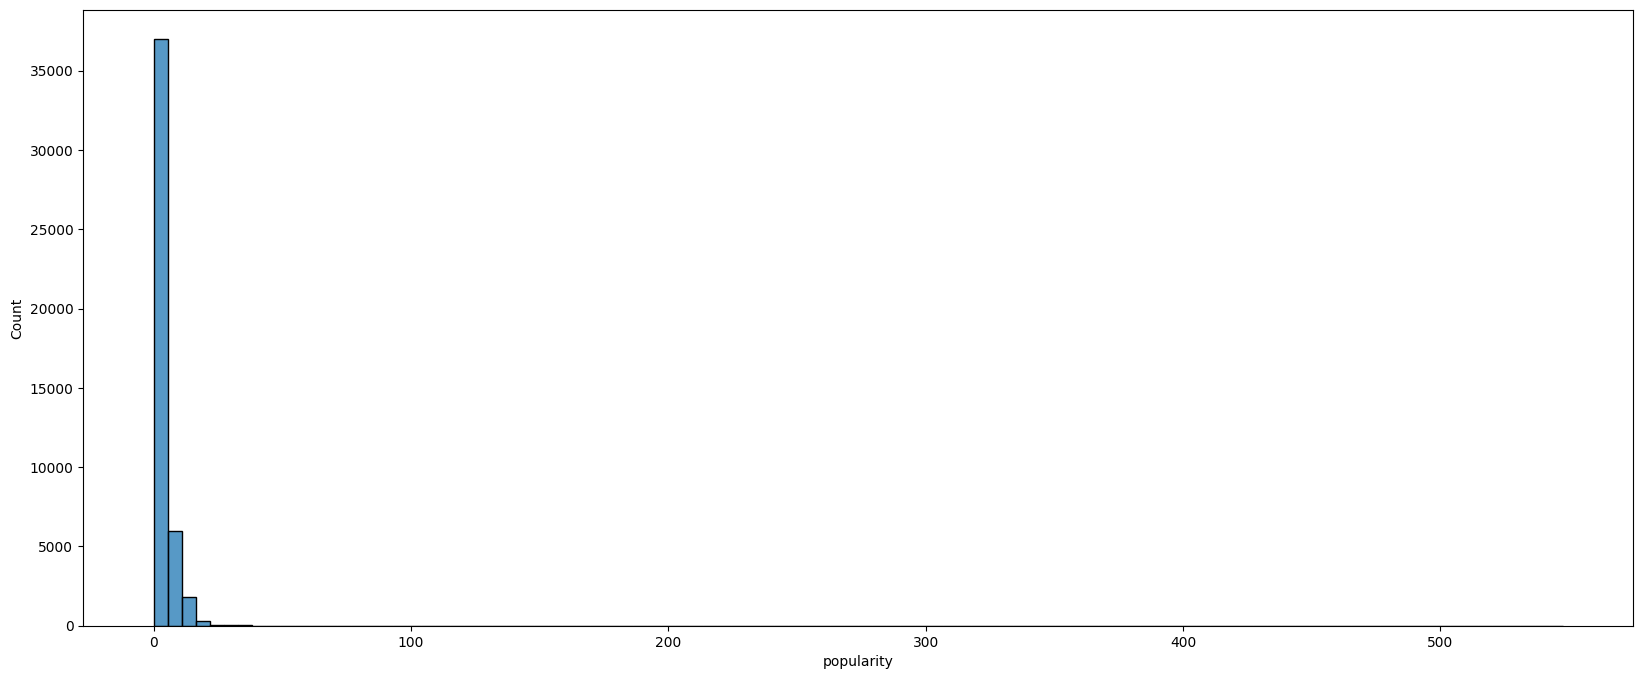

In [36]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['popularity'], bins = 100)
#df_movies_modified['popularity'][0]

La anterior imagen demuestra que la mayoria de las peliculas tiene una popularidad/score baja.

### Revenue

<Axes: xlabel='revenue', ylabel='Count'>

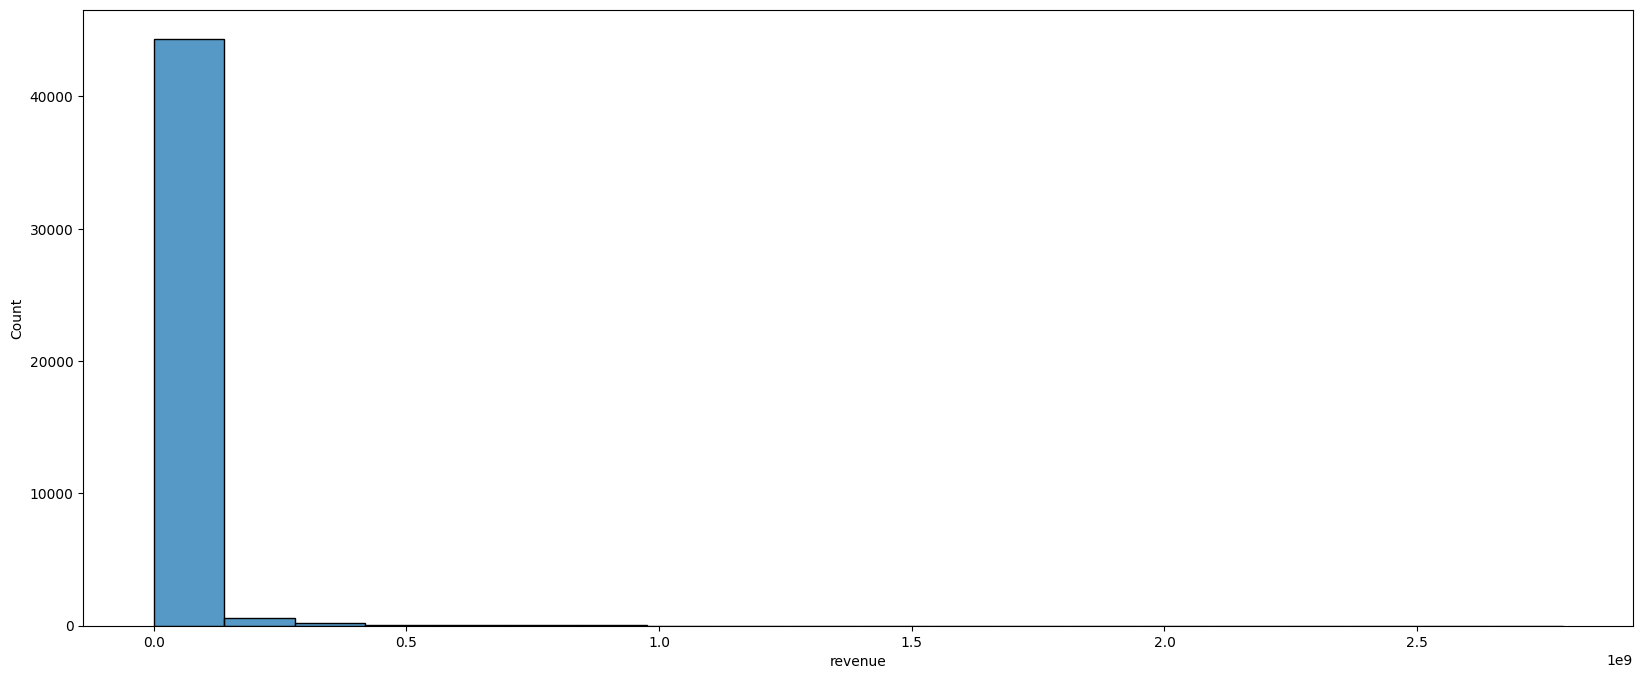

In [37]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['revenue'], bins = 20)

La anterior imagen corrobora que casi todos los datos de la columna revenue son cero.

### Runtime

<Axes: xlabel='runtime', ylabel='Count'>

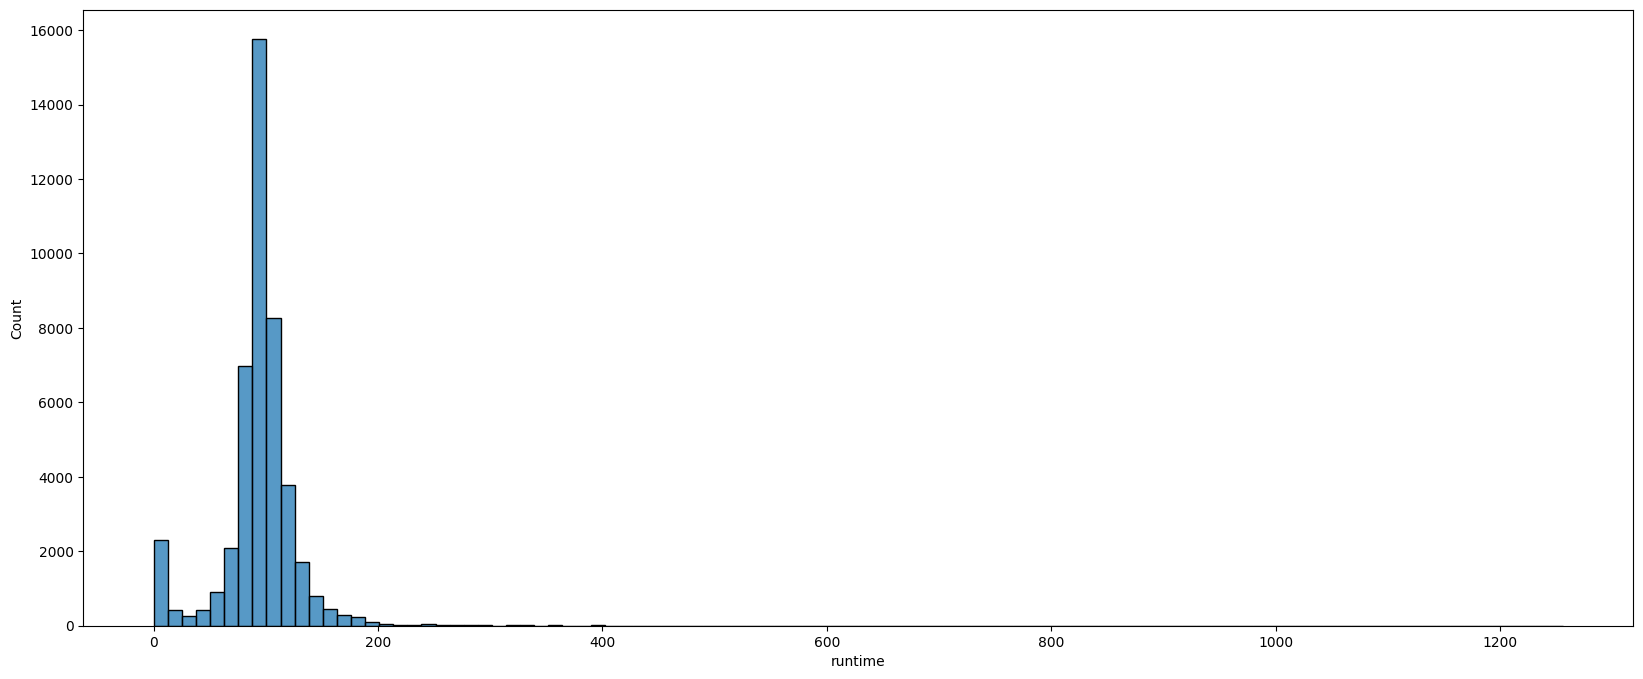

In [38]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['runtime'], bins = 100)

<Axes: xlabel='runtime', ylabel='Count'>

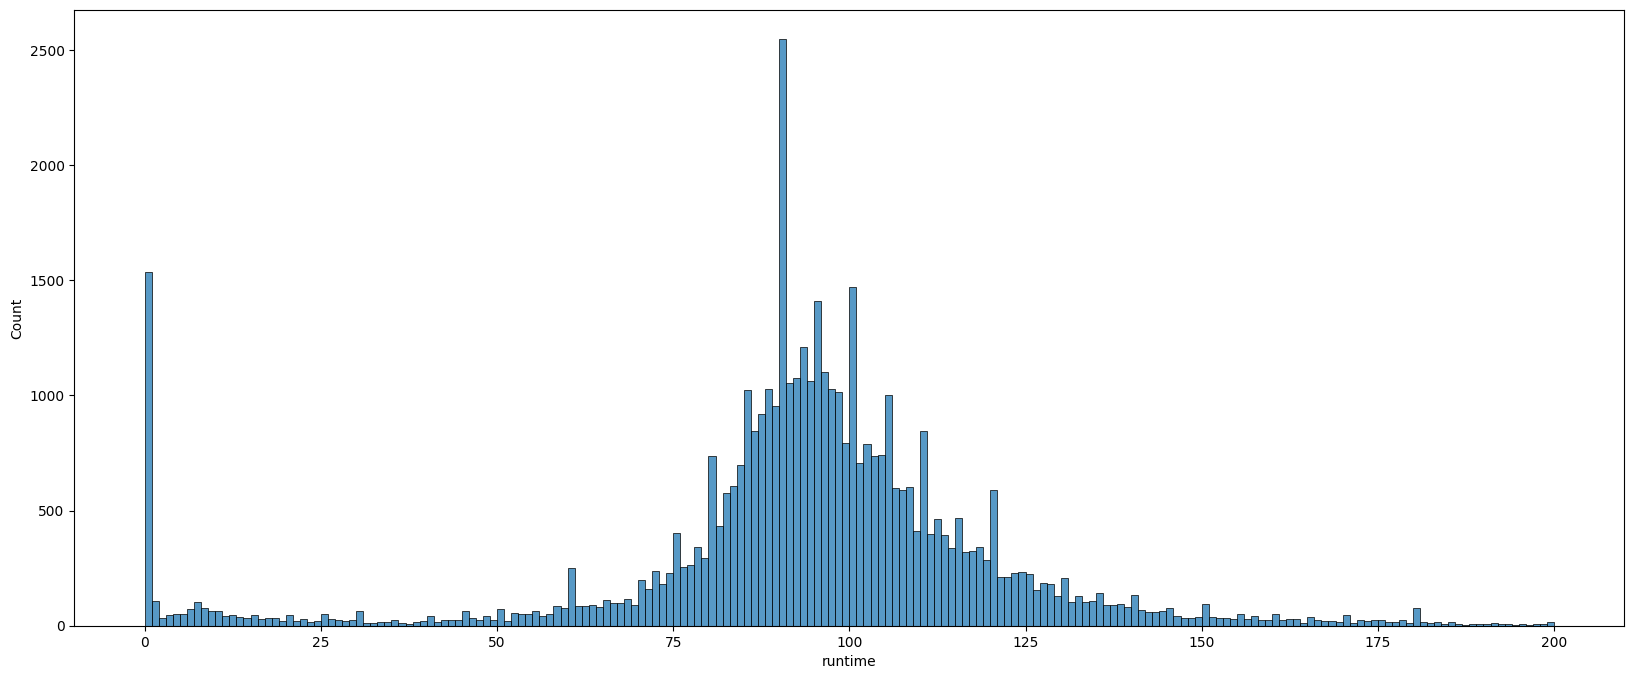

In [39]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified[df_movies_modified['runtime'] <= 200]['runtime'], bins = 200)

<Axes: xlabel='runtime', ylabel='Count'>

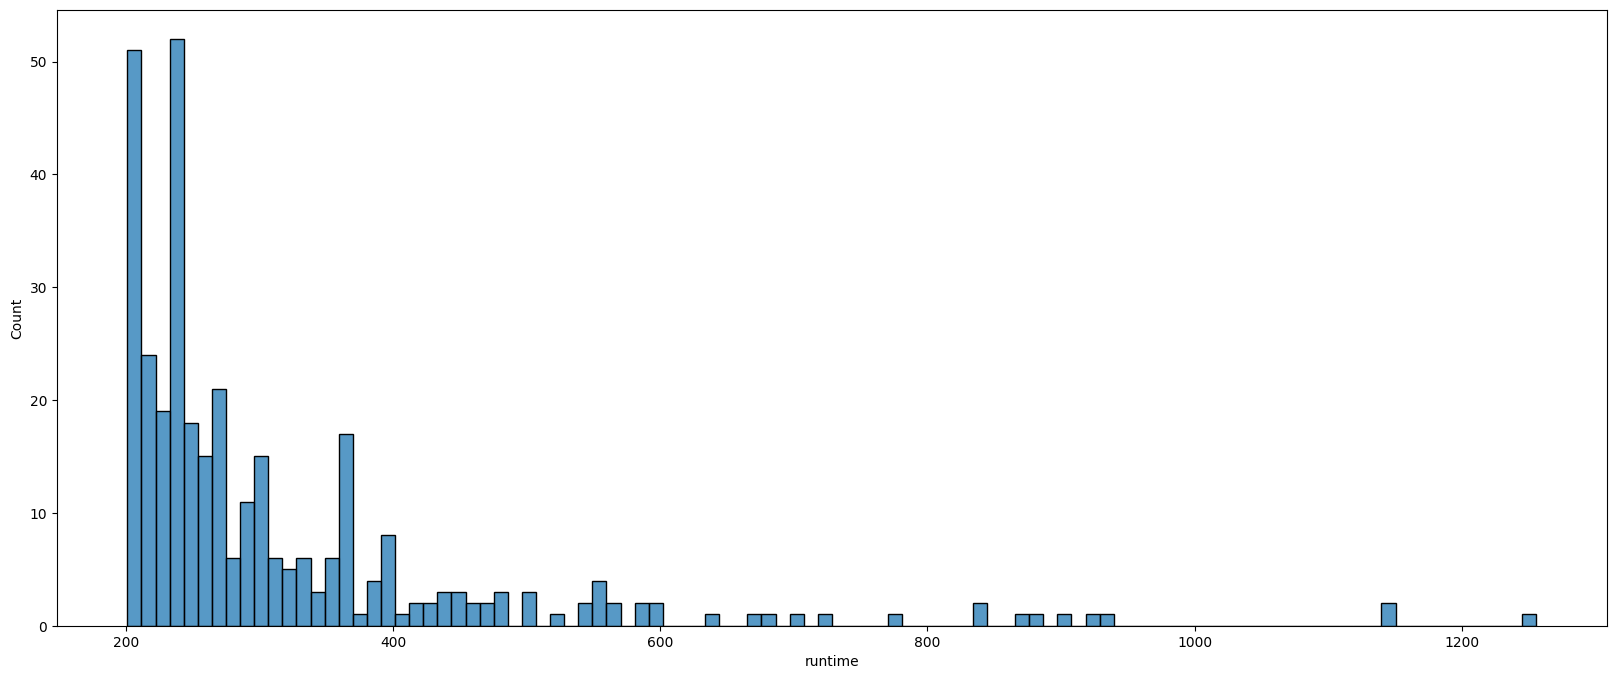

In [40]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified[df_movies_modified['runtime'] > 200]['runtime'], bins = 100)

La anteriores imagenes demuestran que la mayoría de las peliculas tienen una duración promedio de 100 minutos, al ver solo las peliculas con duración menor o igual a 200 minutos se evidencia que hay una distribución casi normal, mientras que las peliculas que tienen una duración mayor a 200 minutos tienen una distribución sesgada a la derecha.  

In [41]:
# Sacar los sppoken languages y hacer una nueva columna solo con los idiomas

In [42]:
df_movies_modified['spoken_languages'][5]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]"

### Status

<Axes: xlabel='status', ylabel='Count'>

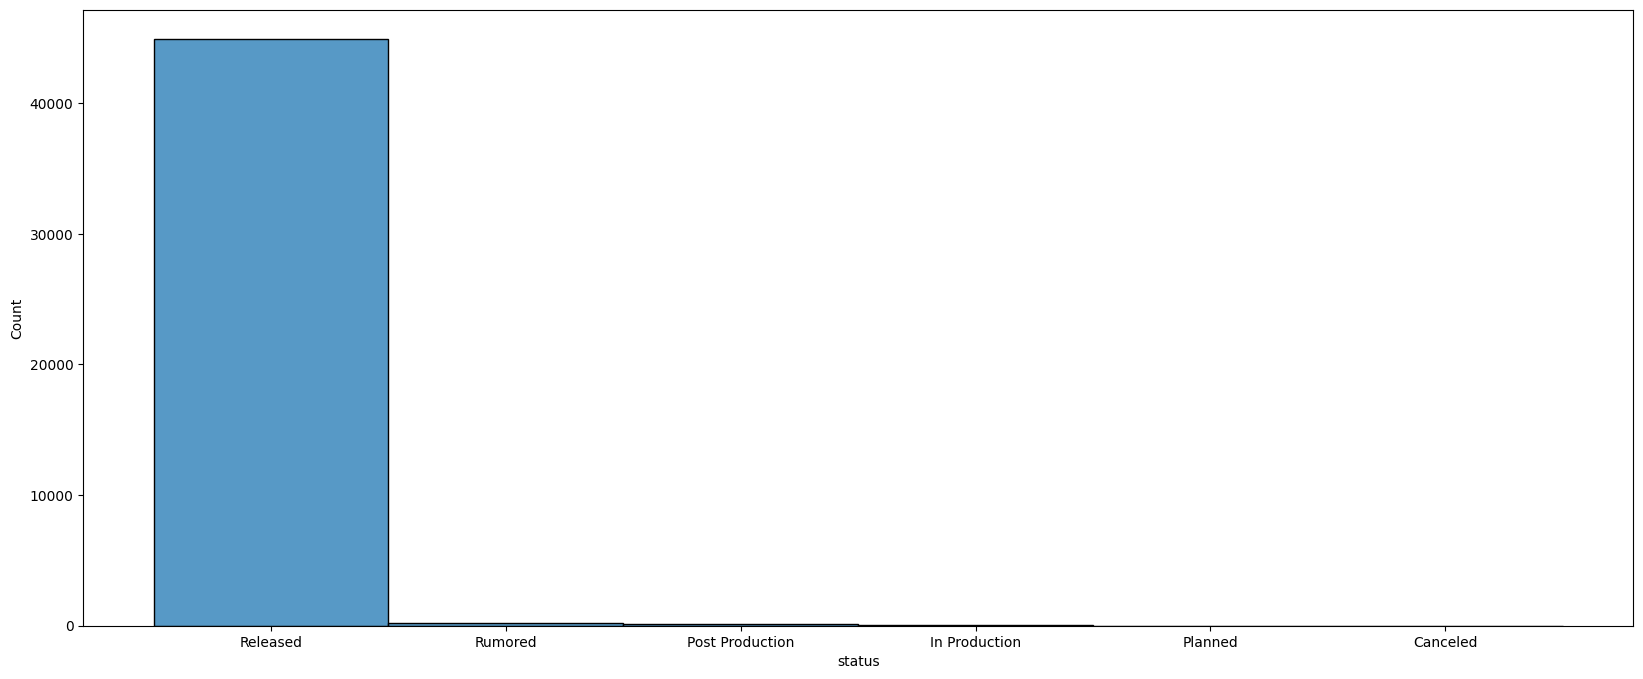

In [43]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['status'], bins = 6)

In [44]:
df_movies_modified['status'].value_counts()

status
Released           44907
Rumored              229
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

Los anteriores bloques de codigo muestran que la mayoría de las peliculas en el dataset ya fueron lanzadas, sin embargo hay algunas peliculas que son rumoreadas, que están en post producción, que están en producción, que han sido planeadas o que han sido canceladas.

### Title

In [45]:
df_movies_modified['title'].value_counts()

title
Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
                        ..
The Burkittsville 7      1
Caged Heat 3000          1
Century of Birthing      1
Satan Triumphant         1
Mighty Aphrodite         1
Name: count, Length: 42196, dtype: int64

El anterior bloque de código demuestra que hay titulos de peliculas que se repiten, por lo que hay que tener cuidado y más bien basarse en el id de la pelacula.

### Vote Average

<Axes: xlabel='vote_average', ylabel='Count'>

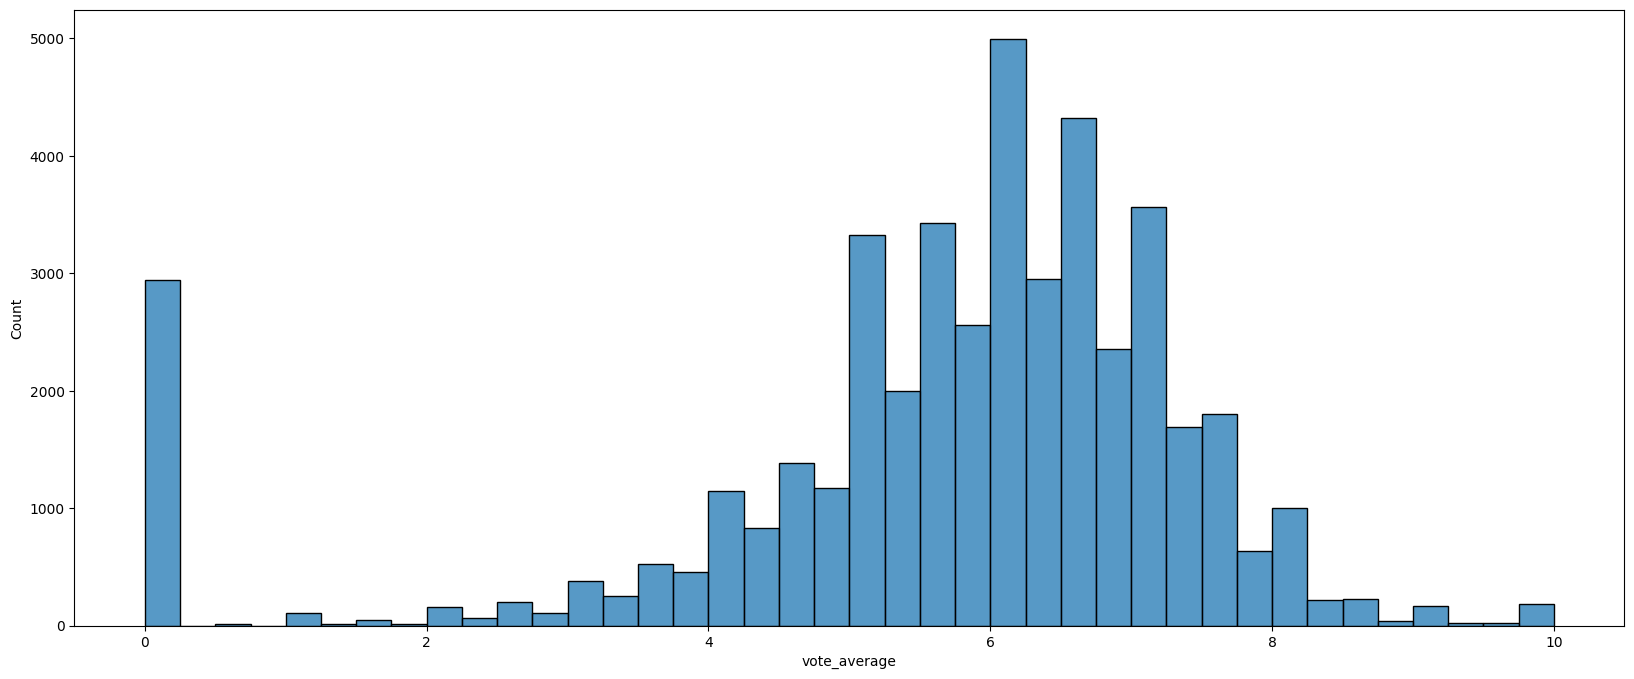

In [46]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['vote_average'], bins = 40)

La imagen anterior muestra que la columna vote average tiene una distribución con un poco de sesgo hacia la izquierda y una gran cantidad de datos en cero.

### Vote Count

<Axes: xlabel='vote_count', ylabel='Count'>

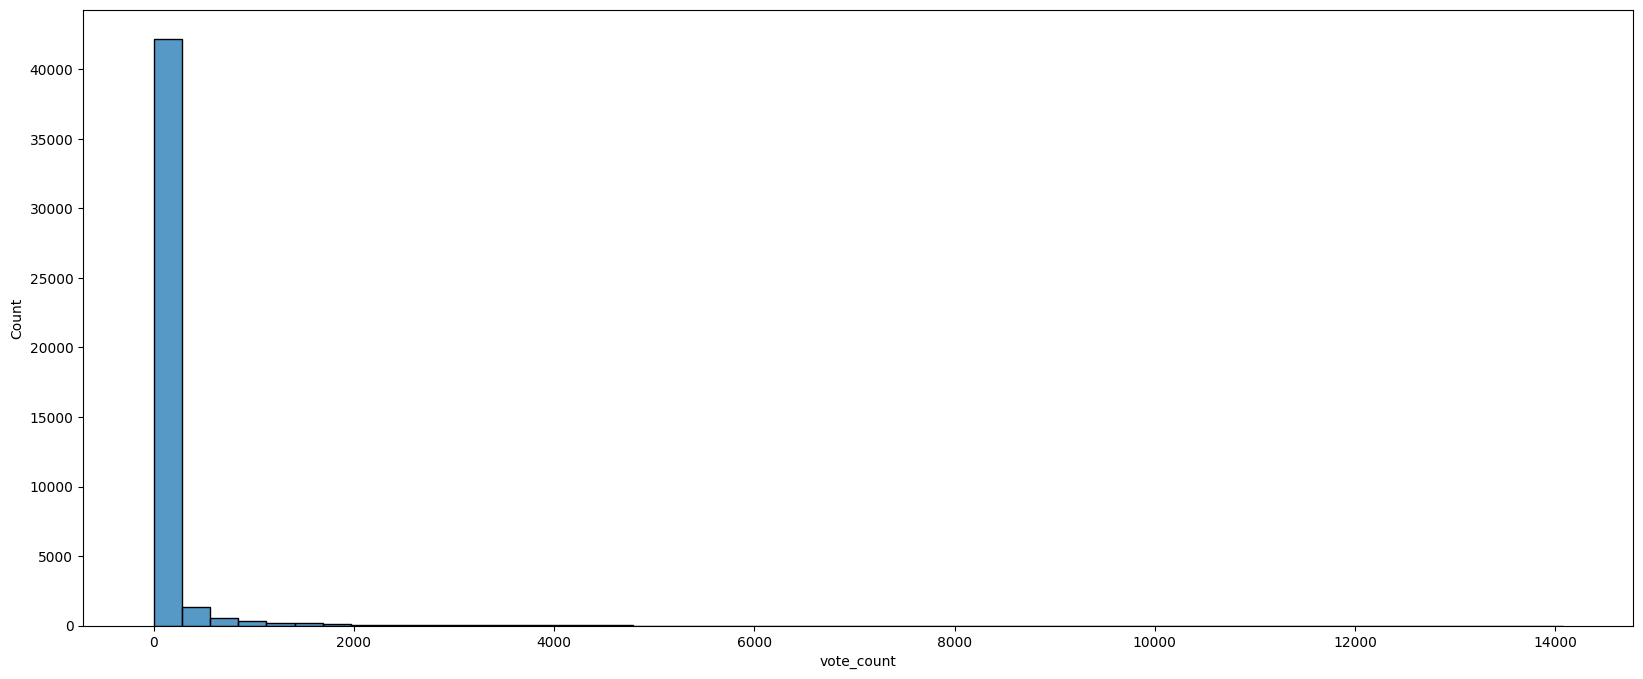

In [47]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['vote_count'], bins = 50)

<Axes: xlabel='vote_count', ylabel='Count'>

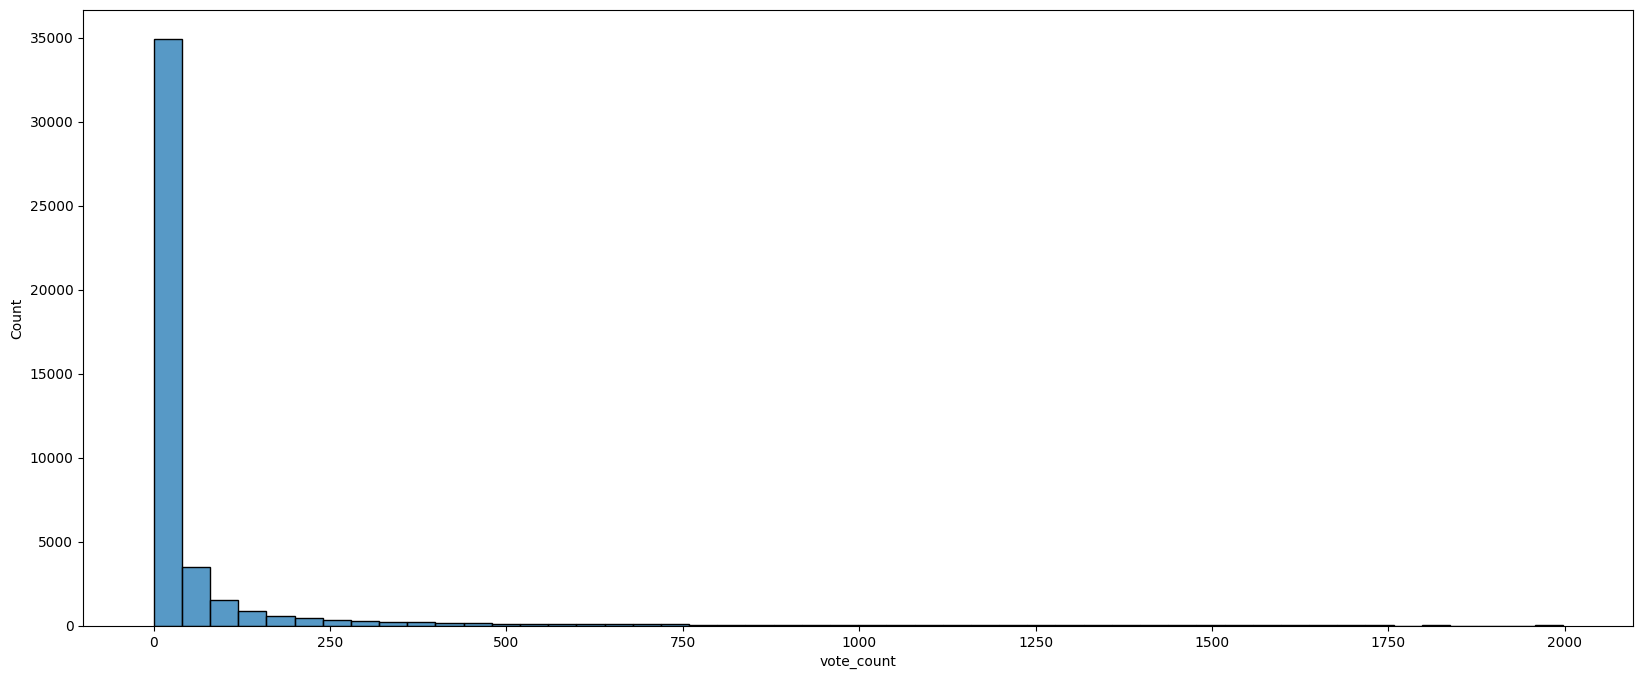

In [48]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified[df_movies_modified['vote_count'] < 2000]['vote_count'], bins = 50)

<Axes: xlabel='vote_count', ylabel='Count'>

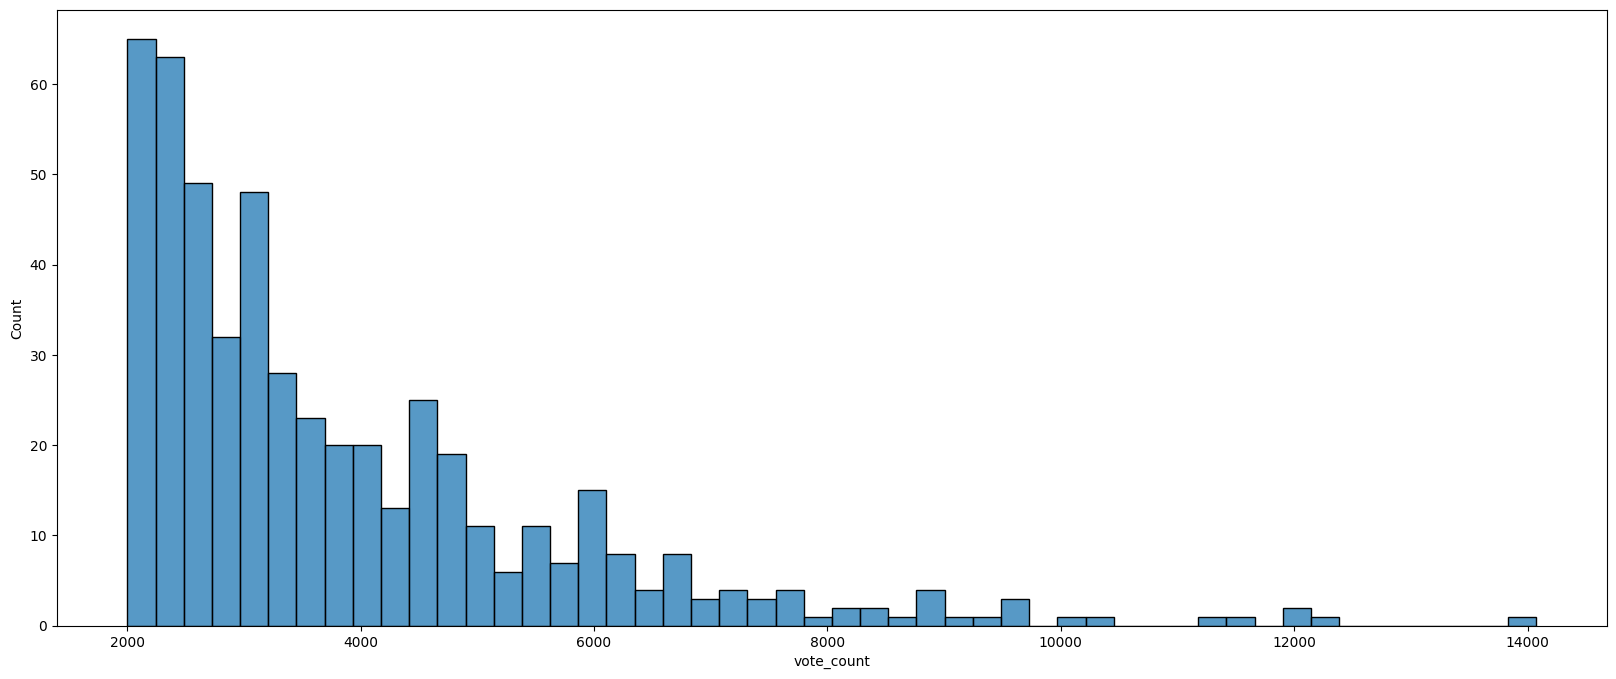

In [49]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified[df_movies_modified['vote_count'] > 2000]['vote_count'], bins = 50)

Las graficas anteriores demuestran que la distribución de los datos de la columna vote count es una distribución sesgada a la derecha, ya que casi todos los valores son 0.

### Year

<Axes: xlabel='year', ylabel='Count'>

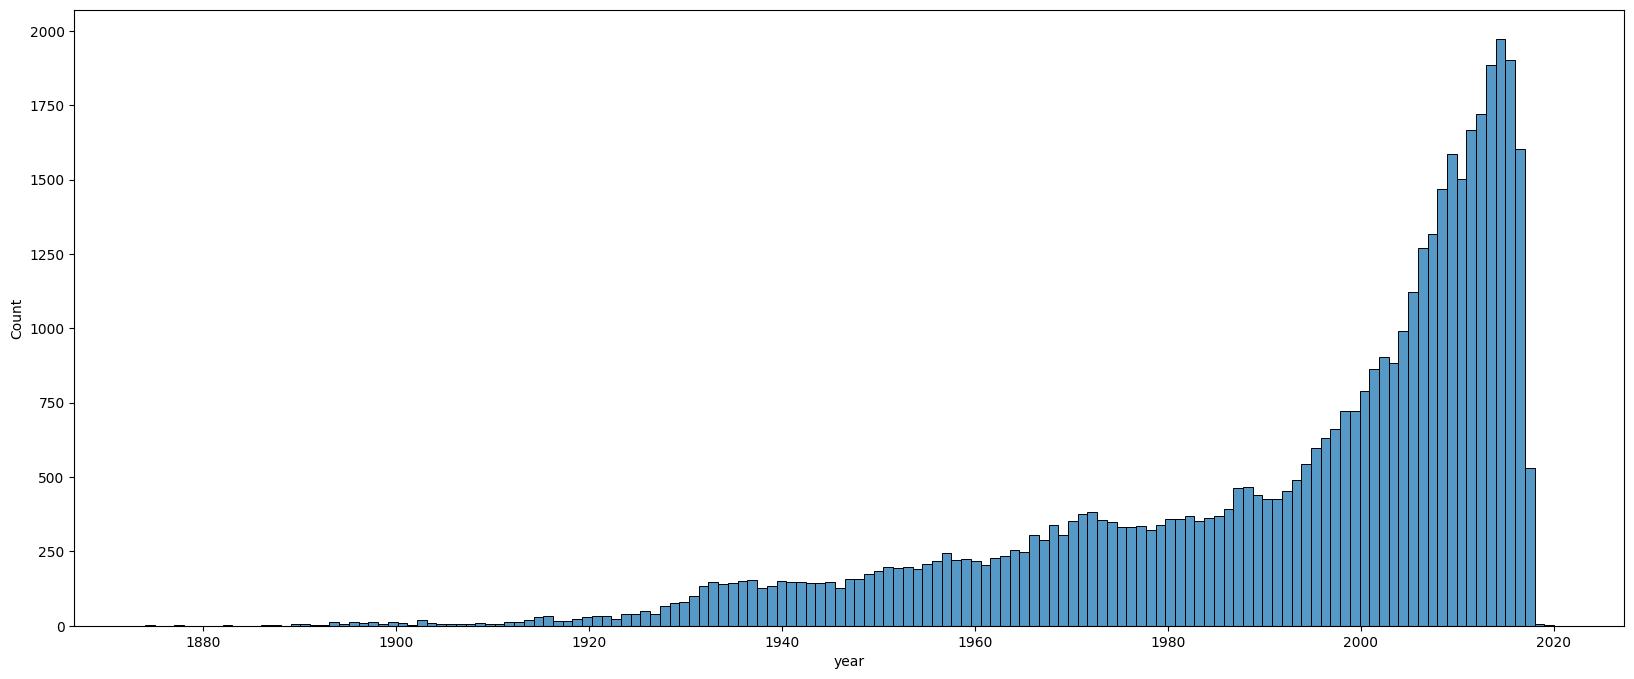

In [50]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['year'], bins = 145)

La gráfica anterior muestra que los valores de la columna year tienen una distribución sesgada a la izquierda, lo que quiere decir que al pasar del tiempo se han hecho y lanzado más peliculas.

### Return

<Axes: xlabel='return', ylabel='Count'>

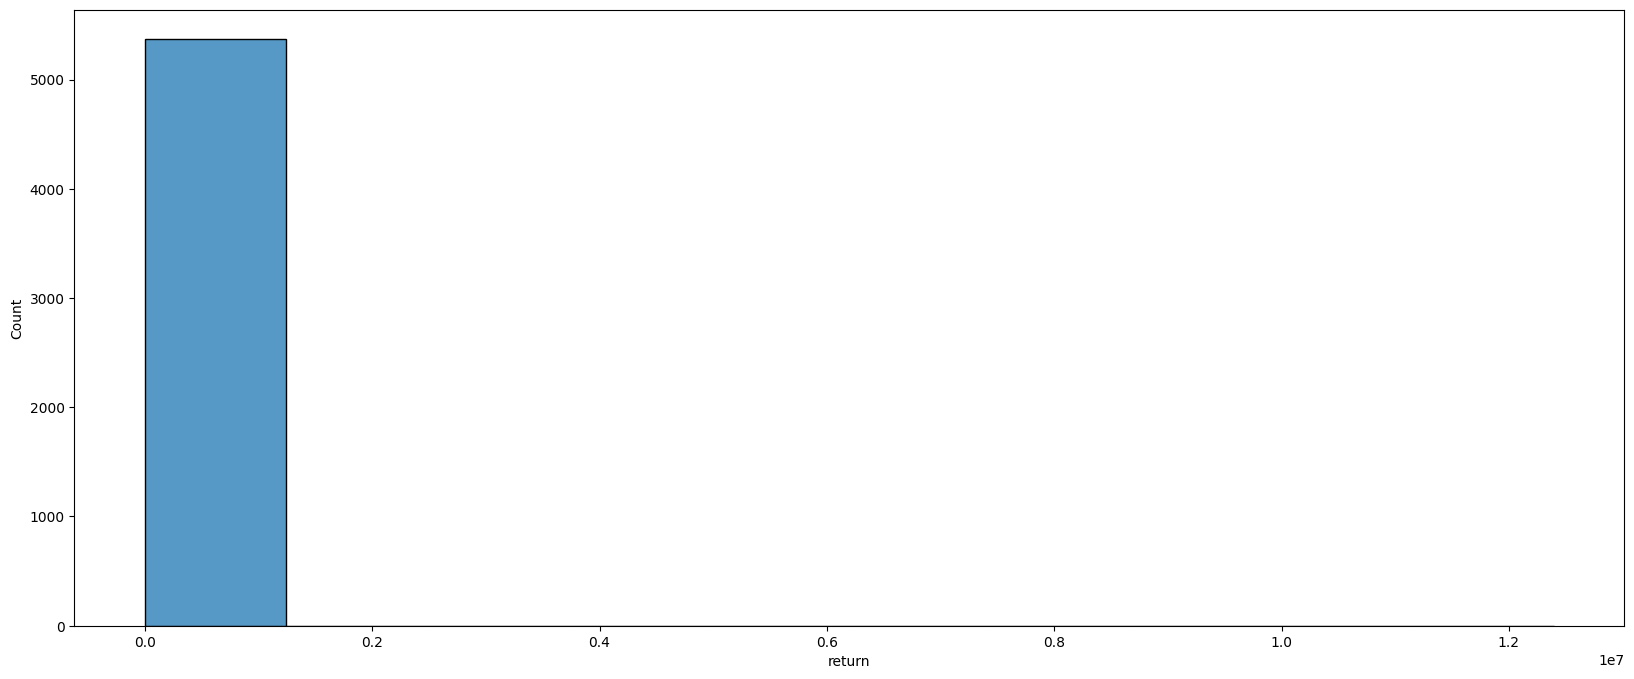

In [51]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified[df_movies_modified['return'] > 0]['return'], bins = 10)

In [52]:
df_movies_modified[df_movies_modified['return'] > 0]['return'].value_counts()

return
1.000000    20
2.000000    12
4.000000    11
5.000000     8
2.500000     7
            ..
1.583333     1
0.000004     1
1.660765     1
0.634397     1
2.484567     1
Name: count, Length: 5231, dtype: int64

In [53]:
max(df_movies_modified['return'])

12396383.0

### Month

<Axes: xlabel='month', ylabel='Count'>

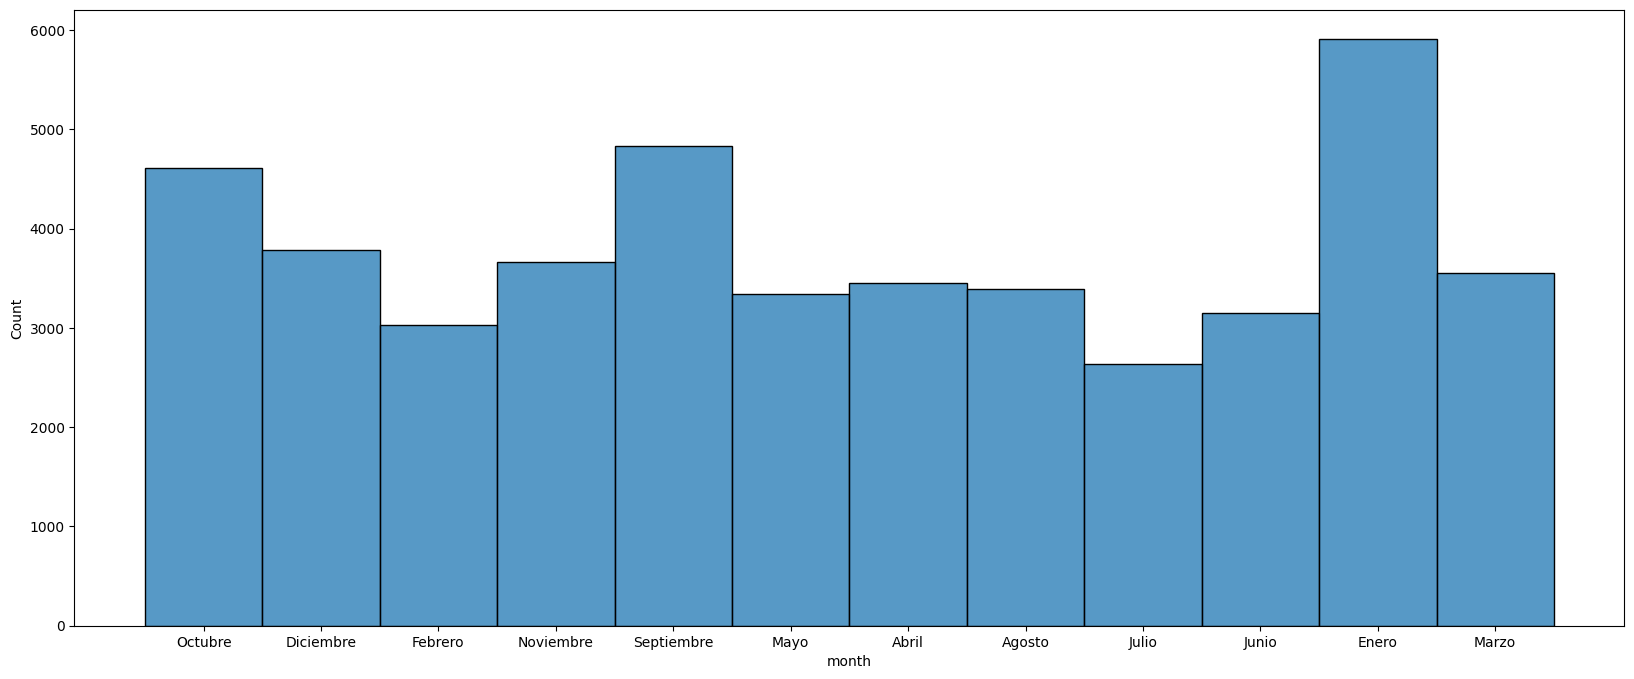

In [54]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['month'], bins = 12)

In [55]:
df_movies_modified['month'].value_counts()

month
Enero         5909
Septiembre    4834
Octubre       4613
Diciembre     3781
Noviembre     3661
Marzo         3549
Abril         3452
Agosto        3393
Mayo          3337
Junio         3151
Febrero       3028
Julio         2638
Name: count, dtype: int64

Lo que se puede ver de los anteriores bloques de código es que hay una distribución de los datos casi homogenea, ya que la diferencia entre cada mes no es muy alta, algo que también se puede ver es que los meses que más lanzamientos de peliculas son los de enero, septimebre y octubre.

### Day

<Axes: xlabel='day', ylabel='Count'>

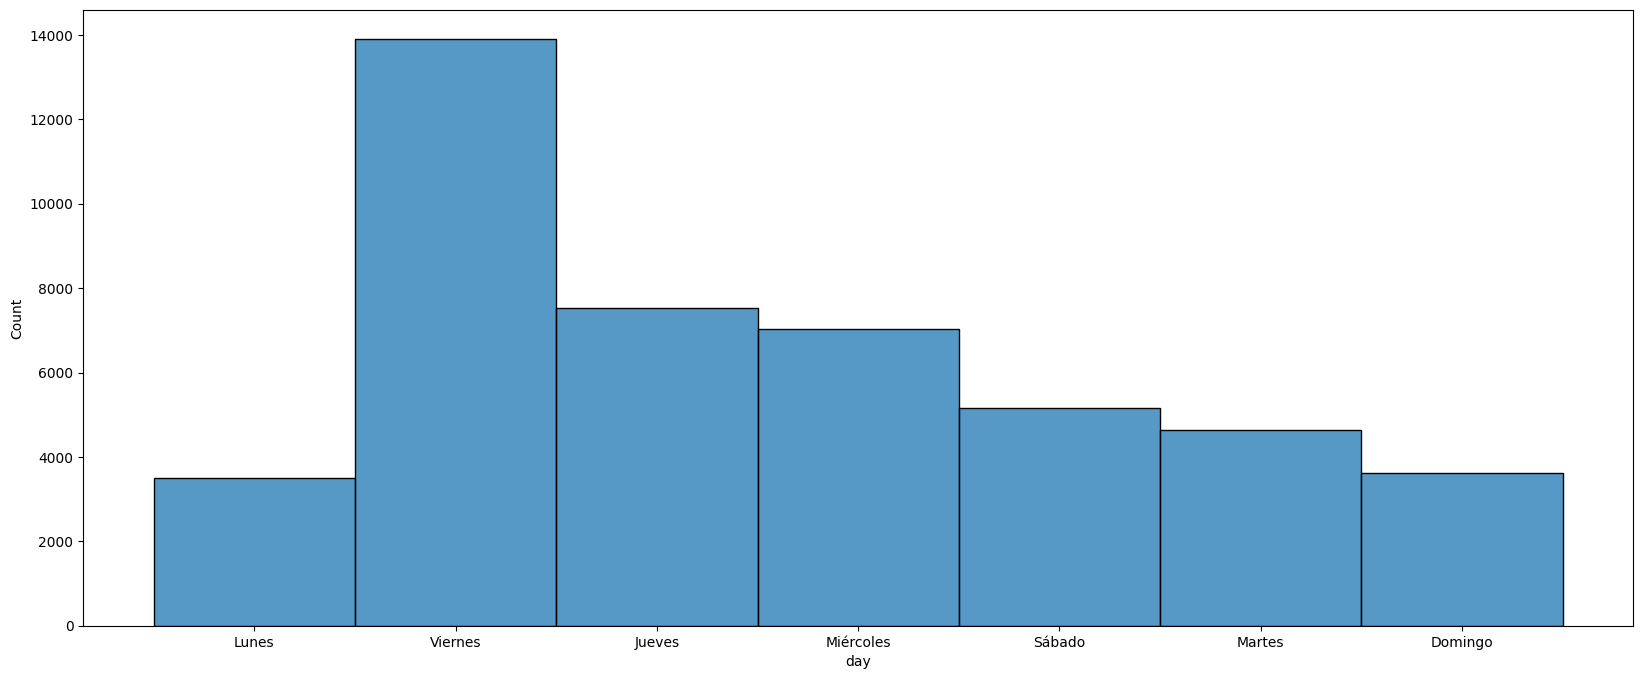

In [56]:
plt.figure(figsize=(20, 8))
sns.histplot(df_movies_modified['day'], bins = 7)

In [57]:
df_movies_modified['day'].value_counts()

day
Viernes      13902
Jueves        7520
Miércoles     7027
Sábado        5149
Martes        4640
Domingo       3608
Lunes         3500
Name: count, dtype: int64

In [58]:
dias = df_movies_modified['day'].value_counts()

In [59]:
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

In [60]:
dias_ordenados = dias.reindex(orden_dias)
dias_ordenados

day
Lunes         3500
Martes        4640
Miércoles     7027
Jueves        7520
Viernes      13902
Sábado        5149
Domingo       3608
Name: count, dtype: int64

In [61]:
df_dias = pd.DataFrame({'dias': dias_ordenados.index, 'cantidad': dias_ordenados.values})
df_dias

dias  cantidad
0      Lunes      3500
1     Martes      4640
2  Miércoles      7027
3     Jueves      7520
4    Viernes     13902
5     Sábado      5149
6    Domingo      3608

<Axes: xlabel='dias', ylabel='cantidad'>

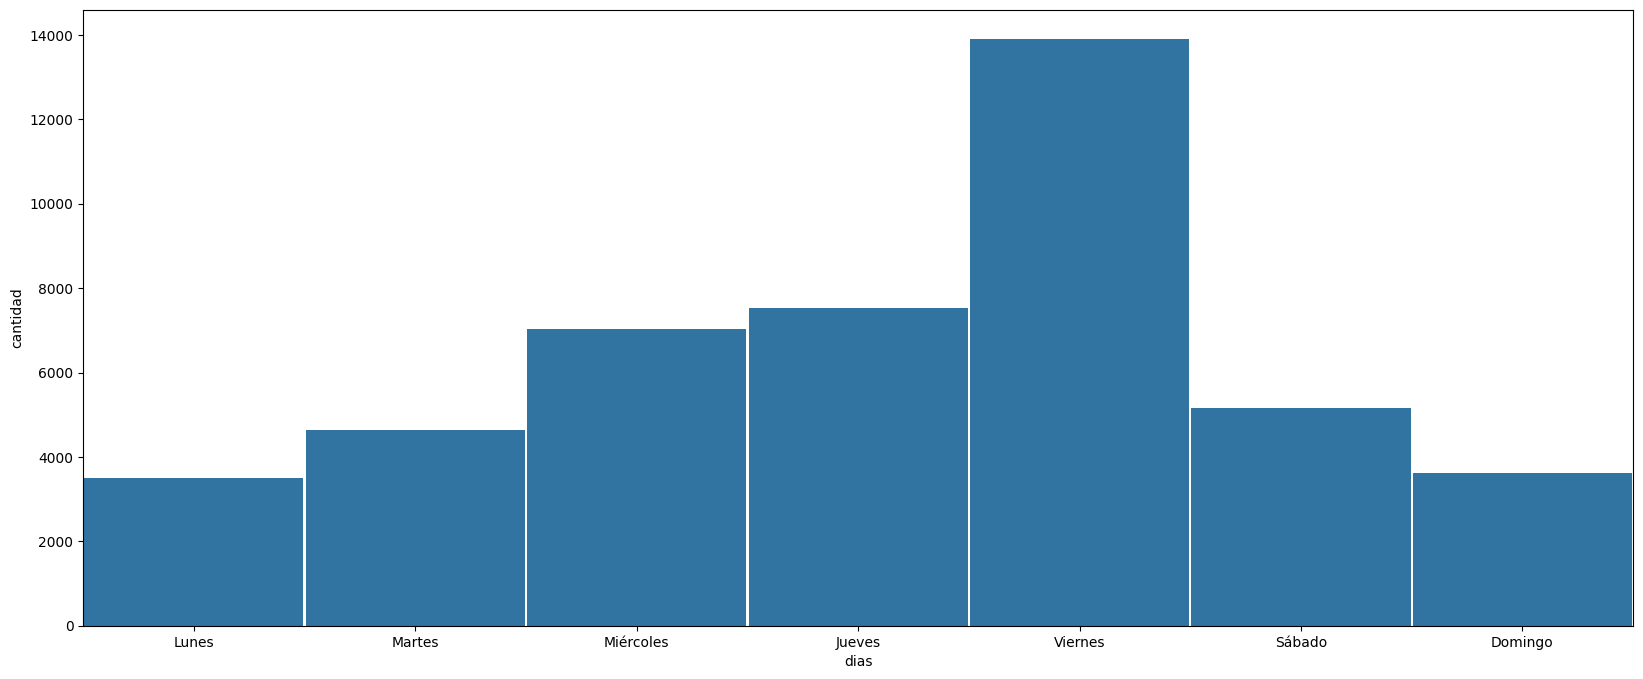

In [62]:
plt.figure(figsize=(20, 8))
sns.barplot(x = df_dias['dias'], y = df_dias['cantidad'], width = 0.99)

Con los anteriores  bloques de código se puede evidenciar que la distribución de los datos de la columna day es una distribución sesgada hacía la izquierda y se nota una gran cantidad de datos en el valor de viernes, por lo que se puede inferir que gran cantidad de los lanzamientos de las peliculas han sido los viernes.

### Genres

In [63]:
lista_generos = []
generos = []
generos_unicos = []

for i in df_movies_modified['genres']:
    valores = ast.literal_eval(i)
    
    for j in range(len(valores)):
        lista_generos.append(valores[j]['name'])
        if valores[j]['name'] not in generos_unicos:
            generos_unicos.append(valores[j]['name'])
            
    generos.append(lista_generos)
    lista_generos = []

In [64]:
df_movies_modified['generos'] = generos

In [65]:
cont = 0
cantidad_x_genero = []

for i in generos_unicos:
    for j in df_movies_modified['generos']:
        if i in j:
            cont += 1

    cantidad_x_genero.append(cont)
    cont = 0

In [66]:
df_generos = pd.DataFrame({'Genero': generos_unicos, 'Cantidad': cantidad_x_genero})
df_generos

Genero  Cantidad
0         Animation      1928
1            Comedy     13175
2            Family      2765
3         Adventure      3488
4           Fantasy      2309
5           Romance      6728
6             Drama     20234
7            Action      6588
8             Crime      4302
9          Thriller      7614
10           Horror      4668
11          History      1397
12  Science Fiction      3037
13          Mystery      2461
14              War      1322
15          Foreign      1618
16            Music      1597
17      Documentary      3919
18          Western      1042
19         TV Movie       765

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'History'),
  Text(12, 0, 'Science Fiction'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Foreign'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Western'),
  Text(19, 0, 'TV Movie')])

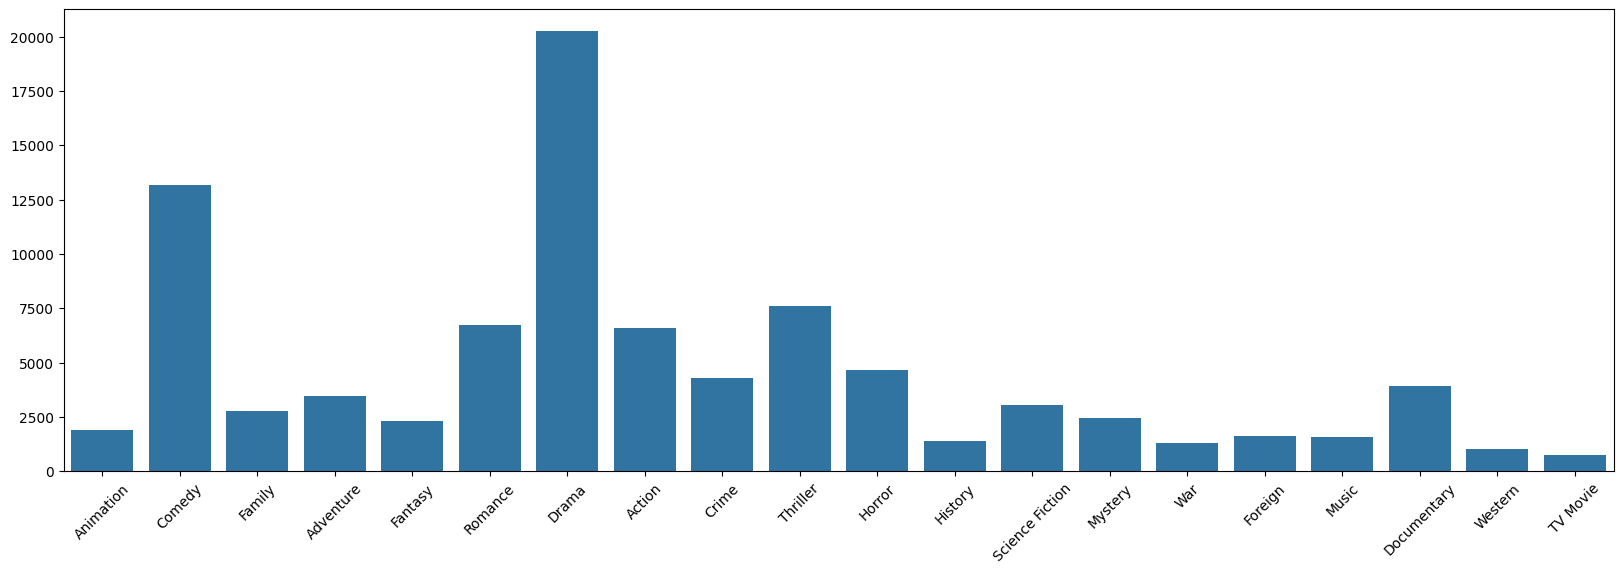

In [67]:
plt.figure(figsize=(20, 6))
sns.barplot(x=generos_unicos, y=cantidad_x_genero)
plt.xticks(rotation=45)

Gracias a la gráfica anterior se puede notar que las generos más peliculas tienen son el genero de drama y el genero de comedia.

### Production Companies

In [68]:
lista_productoras = []
productoras = []
productoras_unicas = []

for i in df_movies_modified['production_companies']:
    valores = ast.literal_eval(i)
    
    for j in range(len(valores)):
        lista_productoras.append(valores[j]['name'])
        if valores[j]['name'] not in productoras_unicas:
            productoras_unicas.append(valores[j]['name'])
            
    productoras.append(lista_productoras)
    lista_productoras = []

In [69]:
df_movies_modified['productoras'] = productoras

In [70]:
cont = 0
cantidad_x_productora = []

for i in productoras_unicas:
    for j in df_movies_modified['productoras']:
        if i in j:
            cont += 1

    cantidad_x_productora.append(cont)
    cont = 0

In [71]:
df_productoras = pd.DataFrame({'Productora': productoras_unicas, 'Cantidad': cantidad_x_productora})
df_productoras.sort_values(by='Cantidad', ascending=False, inplace=True)

In [72]:
df_productoras.head(30)

Productora  Cantidad
4                                    Warner Bros.      1250
32                      Metro-Goldwyn-Mayer (MGM)      1074
11                             Paramount Pictures      1001
6          Twentieth Century Fox Film Corporation       836
18                             Universal Pictures       830
37                  Columbia Pictures Corporation       448
45                                         Canal+       436
23                              Columbia Pictures       431
577                            RKO Radio Pictures       290
21                                 United Artists       279
51                                New Line Cinema       277
17                           Walt Disney Pictures       263
8                             Touchstone Pictures       225
1                                TriStar Pictures       197
1042                                      Mosfilm       188
38                                  Miramax Films       182
191                               France 2 Cinéma       167
65    Centre National de la Cinématographie (CNC)       162
792                                  Toho Company       141
52                                      BBC Films       131
355                                       Gaumont       126
82                                    StudioCanal       123
7188                             Relativity Media       119
124                          TF1 Films Production       117
161        British Broadcasting Corporation (BBC)       117
574                       Walt Disney Productions       117
449                                Orion Pictures       111
713                     Village Roadshow Pictures       106
9                             Regency Enterprises       106
1054        Universal International Pictures (UI)        98

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Warner Bros.'),
  Text(1, 0, 'Metro-Goldwyn-Mayer (MGM)'),
  Text(2, 0, 'Paramount Pictures'),
  Text(3, 0, 'Twentieth Century Fox Film Corporation'),
  Text(4, 0, 'Universal Pictures'),
  Text(5, 0, 'Columbia Pictures Corporation'),
  Text(6, 0, 'Canal+'),
  Text(7, 0, 'Columbia Pictures'),
  Text(8, 0, 'RKO Radio Pictures'),
  Text(9, 0, 'United Artists'),
  Text(10, 0, 'New Line Cinema'),
  Text(11, 0, 'Walt Disney Pictures'),
  Text(12, 0, 'Touchstone Pictures'),
  Text(13, 0, 'TriStar Pictures'),
  Text(14, 0, 'Mosfilm'),
  Text(15, 0, 'Miramax Films'),
  Text(16, 0, 'France 2 Cinéma'),
  Text(17, 0, 'Centre National de la Cinématographie (CNC)'),
  Text(18, 0, 'Toho Company'),
  Text(19, 0, 'BBC Films'),
  Text(20, 0, 'Gaumont'),
  Text(21, 0, 'StudioCanal'),
  Text(22, 0, 'Relativity Media'),
  Te

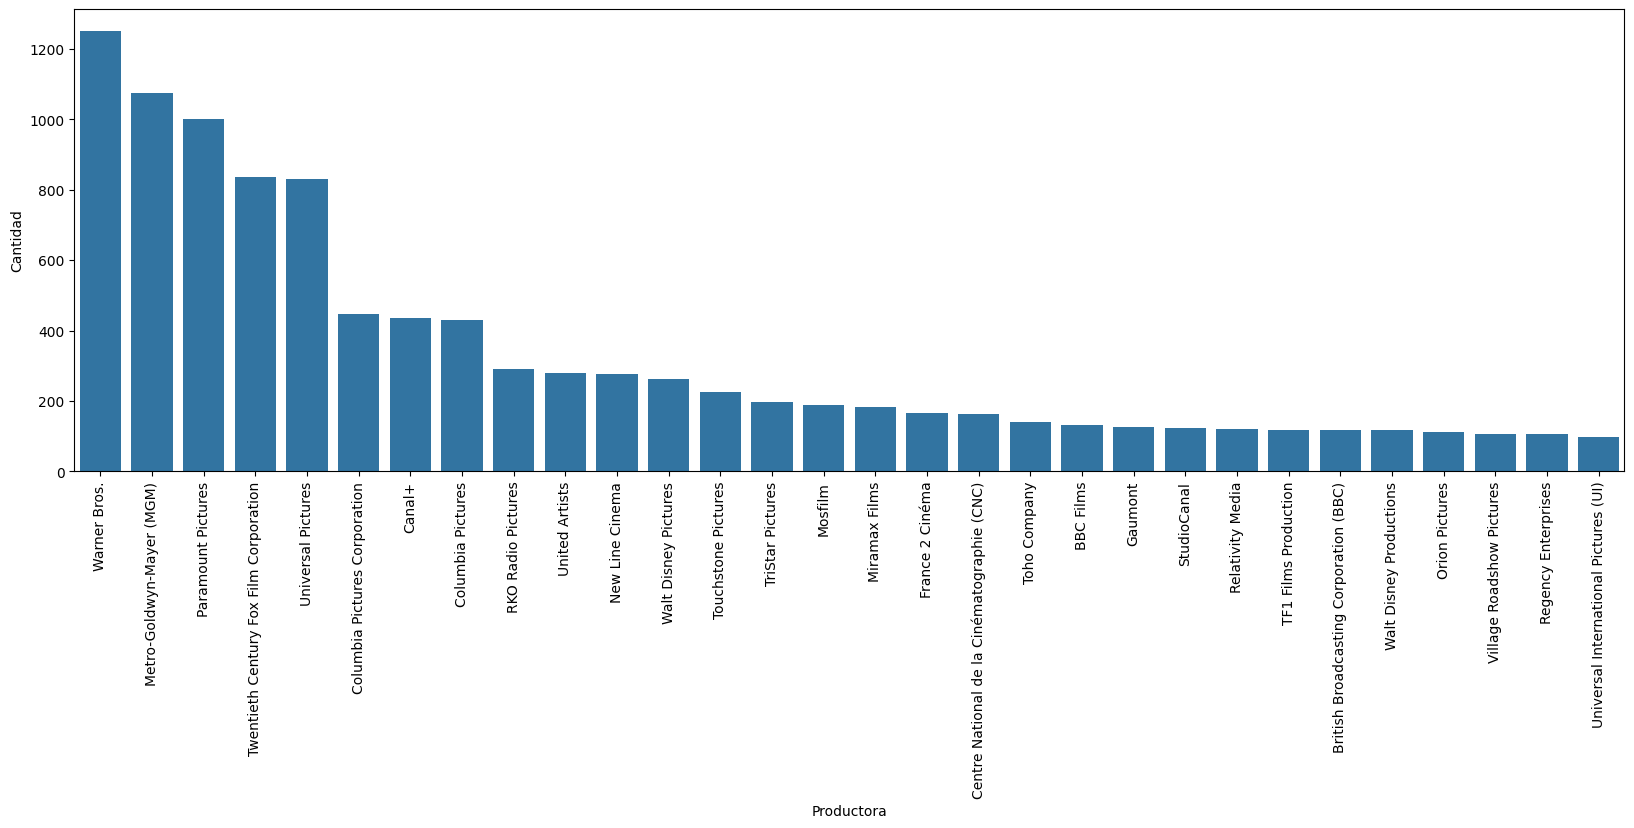

In [73]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df_productoras['Productora'].head(30), y=df_productoras['Cantidad'].head(30))
plt.xticks(rotation=90)

De la anterior gráfica se puede ver que la productora con más peliculas lanzadas ha sido Warner Bros, y que cerca también estan MGM, Paramount Pictures, Twentieth Century Fox Film Corporation y universal Pictures.

### Production Countries

In [74]:
lista_paises = []
paises = []
paises_unicos = []

for i in df_movies_modified['production_countries']:
    valores = ast.literal_eval(i)
    
    for j in range(len(valores)):
        lista_paises.append(valores[j]['name'])
        if valores[j]['name'] not in paises_unicos:
            paises_unicos.append(valores[j]['name'])
            
    paises.append(lista_paises)
    lista_paises = []

In [75]:
df_movies_modified['paises'] = paises

In [76]:
cont = 0
cantidad_x_pais = []

for i in paises_unicos:
    for j in df_movies_modified['paises']:
        if i in j:
            cont += 1

    cantidad_x_pais.append(cont)
    cont = 0

In [77]:
df_paises = pd.DataFrame({'Pais': paises_unicos, 'Cantidad': cantidad_x_pais})
df_paises.sort_values(by='Cantidad', ascending=False, inplace=True)

In [78]:
df_paises.head(30)

Pais  Cantidad
0   United States of America     21134
2             United Kingdom      4088
3                     France      3931
1                    Germany      2249
4                      Italy      2165
9                     Canada      1765
12                     Japan      1645
5                      Spain       964
20                    Russia       911
40                     India       826
15                 Hong Kong       596
33                    Sweden       586
7                  Australia       570
36               South Korea       494
11                   Belgium       446
30                   Denmark       384
32                   Finland       381
14               Netherlands       375
6                      China       372
25                    Mexico       328
26                    Poland       318
41                    Brazil       291
34                 Argentina       254
10               Switzerland       254
17                   Ireland       225
39            Czech Republic       209
22                   Austria       209
52                    Norway       201
38                   Hungary       175
42                    Greece       169

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'India'),
  Text(10, 0, 'Hong Kong'),
  Text(11, 0, 'Sweden'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'South Korea'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Denmark'),
  Text(16, 0, 'Finland'),
  Text(17, 0, 'Netherlands'),
  Text(18, 0, 'China'),
  Text(19, 0, 'Mexico'),
  Text(20, 0, 'Poland'),
  Text(21, 0, 'Brazil'),
  Text(22, 0, 'Argentina'),
  Text(23, 0, 'Switzerland'),
  Text(24, 0, 'Ireland'),
  Text(25, 0, 'Czech Republic'),
  Text(26, 0, 'Austria'),
  Text(27, 0, 'Norway'),
  Text(28, 0, 'Hungary'),
  Text(29, 0, 'Greece')])

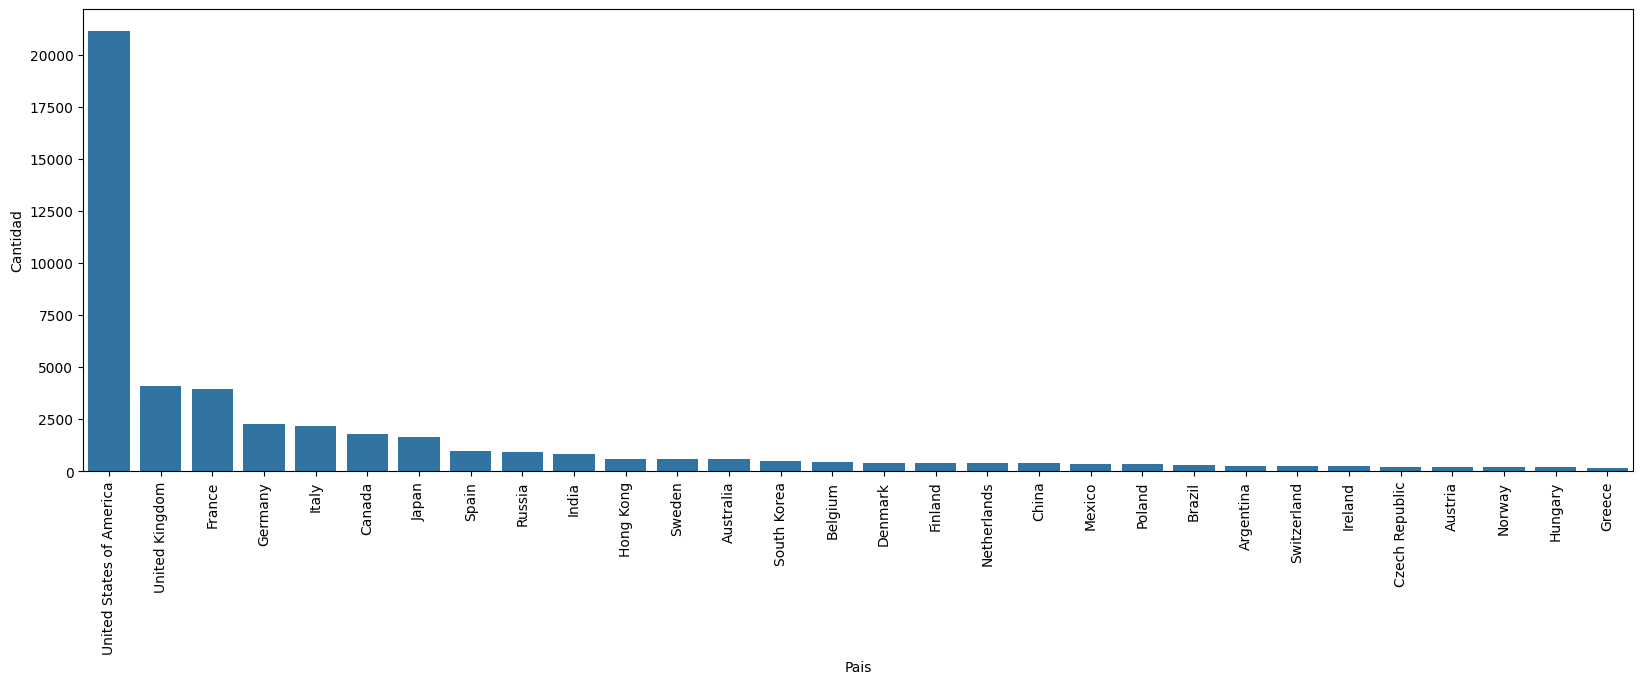

In [79]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df_paises['Pais'].head(30), y=df_paises['Cantidad'].head(30))
plt.xticks(rotation=90)

De la gráfica anterior se puede evidenciar que en estados unidos es donde más se hacen peliculas o donde más se lanzan.

### Spoken languages

In [80]:
lista_idiomas_hablados = []
idiomas_hablados = []
idiomas_hablados_unicos = []

for i in df_movies_modified['spoken_languages']:
    valores = ast.literal_eval(i)
    
    for j in range(len(valores)):
        lista_idiomas_hablados.append(valores[j]['name'])
        if valores[j]['name'] not in idiomas_hablados_unicos:
            idiomas_hablados_unicos.append(valores[j]['name'])
            
    idiomas_hablados.append(lista_idiomas_hablados)
    lista_idiomas_hablados = []

In [81]:
df_movies_modified['idiomas_hablados'] = idiomas_hablados

In [82]:
cont = 0
cantidad_x_idioma_hablado = []

for i in idiomas_hablados_unicos:
    for j in df_movies_modified['spoken_languages']:
        if i in j:
            cont += 1

    cantidad_x_idioma_hablado.append(cont)
    cont = 0

In [83]:
df_idiomas_hablados = pd.DataFrame({'Idioma': idiomas_hablados_unicos, 'Cantidad': cantidad_x_idioma_hablado})
df_idiomas_hablados.sort_values(by='Cantidad', ascending=False, inplace=True)

In [84]:
df_idiomas_hablados['Idioma'].unique()

array(['', 'English', 'Français', 'Deutsch', 'Español', 'Italiano', '日本語',
       'Pусский', '普通话', 'हिन्दी', 'Português', 'svenska', '한국어/조선말',
       'Polski', '广州话 / 廣州話', 'suomi', 'Magyar', 'العربية', 'Nederlands',
       'No Language', 'Dansk', 'Český', 'Türkçe', 'עִבְרִית', 'ελληνικά',
       'ภาษาไทย', 'Norsk', 'فارسی', 'Latin', 'Română', 'தமிழ்', 'Srpski',
       'తెలుగు', 'Tiếng Việt', 'Íslenska', 'اردو', 'Український',
       'Hrvatski', 'Eesti', 'বাংলা', 'Bahasa indonesia', 'Català',
       'Bosanski', 'ქართული', 'български език', 'shqip', 'Afrikaans',
       'Slovenčina', 'Kiswahili', 'Slovenščina', 'Gaeilge', 'Latviešu',
       'isiZulu', 'ਪੰਜਾਬੀ', 'Bahasa melayu', 'euskera', 'Wolof', 'қазақ',
       'Cymraeg', 'Somali', '?????', 'پښتو', 'Esperanto', 'Bamanankan',
       'Galego', '??????', 'Azərbaycan', 'Malti', 'Bokmål', 'Kinyarwanda',
       'беларуская мова', 'ozbek', 'Fulfulde', 'Hausa', 'Lietuvi\x9akai'],
      dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74],
 [Text(0, 0, ''),
  Text(1, 0, 'English'),
  Text(2, 0, 'Français'),
  Text(3, 0, 'Deutsch'),
  Text(4, 0, 'Español'),
  Text(5, 0, 'Italiano'),
  Text(6, 0, '日本語'),
  Text(7, 0, 'Pусский'),
  Text(8, 0, '普通话'),
  Text(9, 0, 'हिन्दी'),
  Text(10, 0, 'Português'),
  Text(11, 0, 'svenska'),
  Text(12, 0, '한국어/조선말'),
  Text(13, 0, 'Polski'),
  Text(14, 0, '广州话 / 廣州話'),
  Text(15, 0, 'suomi'),
  Text(16, 0, 'Magyar'),
  Text(17, 0, 'العربية'),
  Text(18, 0, 'Nederlands'),
  Text(19, 0, 'No Language'),
  Text(20, 0, 'Dansk'),
  Text(21, 0, 'Český'),
  Text(2

c:\Users\javig\OneDrive\Desktop\Henry\Proyectos\Individual_Henry_Project1\entornoVPI1\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\javig\OneDrive\Desktop\Henry\Proyectos\Individual_Henry_Project1\entornoVPI1\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\javig\OneDrive\Desktop\Henry\Proyectos\Individual_Henry_Project1\entornoVPI1\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\javig\OneDrive\Desktop\Henry\Proyectos\Individual_Henry_Project1\entornoVPI1\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jav

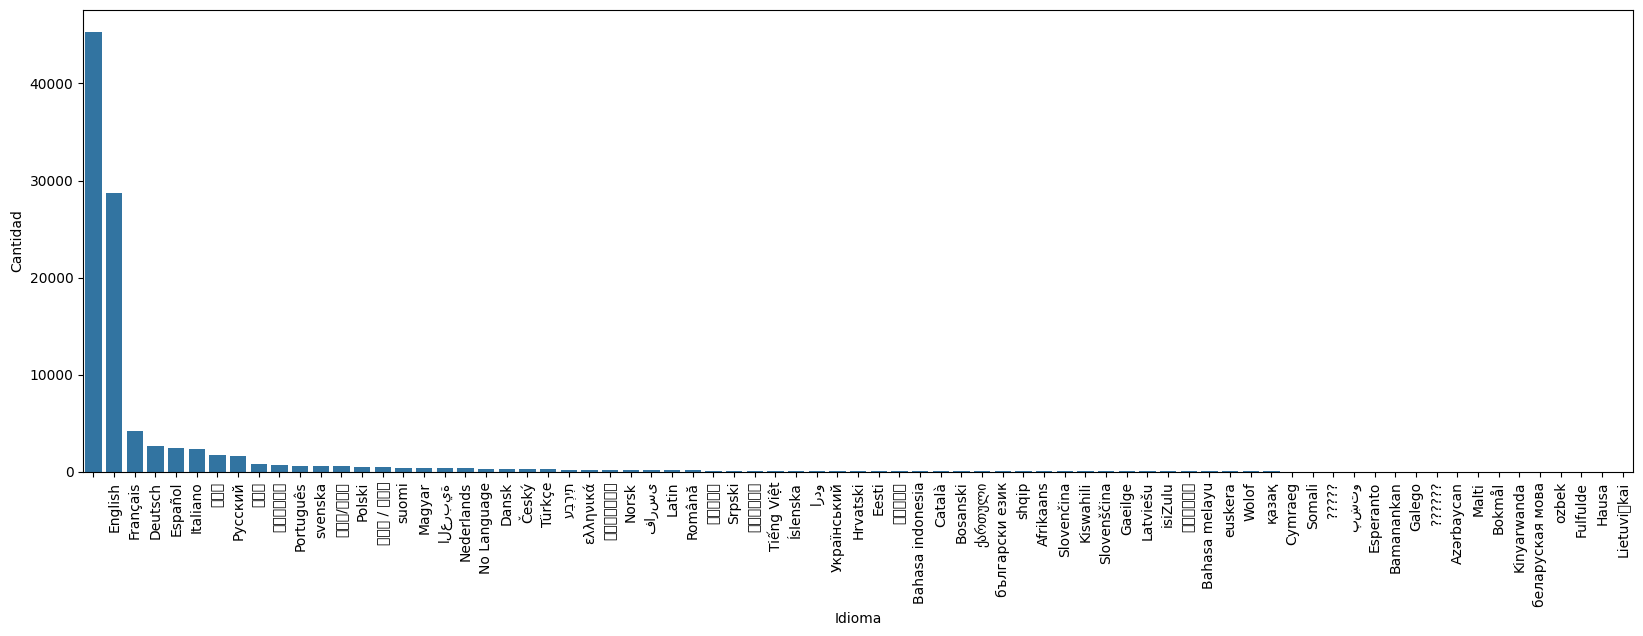

In [85]:
plt.figure(figsize=(20, 6))
sns.barplot(x = df_idiomas_hablados['Idioma'], y = df_idiomas_hablados['Cantidad'])
plt.xticks(rotation=90)

Se evidencia que hay una gran cantidad de registros de las peliculas que tiene un supuesto idioma vacio. El idioma que le sigue es el inglés y por lo que se ve tiene casi 30000 participaciones. 

## Análisis de coorrelación y de relación entre variables.

In [86]:
df_movies_modified2 = df_movies_modified.copy()

In [87]:
df_movies_modified2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45346 non-null  int64  
 2   genres                 45346 non-null  object 
 3   id                     45346 non-null  int64  
 4   original_language      45335 non-null  object 
 5   overview               44405 non-null  object 
 6   popularity             45346 non-null  float64
 7   production_companies   45346 non-null  object 
 8   production_countries   45346 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45346 non-null  float64
 11  runtime                45100 non-null  float64
 12  spoken_languages       45346 non-null  object 
 13  status                 45266 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

In [88]:
encoder = LabelEncoder()
lenguajes_originales = encoder.fit_transform(df_movies_modified2['original_language'])
estatus = encoder.fit_transform(df_movies_modified2['status'])
mes = encoder.fit_transform(df_movies_modified2['month'])
dia = encoder.fit_transform(df_movies_modified2['day'])
#generos2 = encoder.fit_transform(df_movies_modified2['generos'])
#productoras2 = encoder.fit_transform(df_movies_modified2['productoras'])
#paises2 = encoder.fit_transform(df_movies_modified2['paises'])
#idiomas_hablados2 = encoder.fit_transform(df_movies_modified2['idiomas_hablados'])


In [89]:
df_movies_modified2['lenguajes_originales'] = lenguajes_originales
df_movies_modified2['estatus'] = estatus
df_movies_modified2['mes'] = mes
df_movies_modified2['dia'] = dia
#df_movies_modified2['generos2'] = generos2
#df_movies_modified2['productoras2'] = productoras2
#df_movies_modified2['paises2'] = paises2
#df_movies_modified2['idiomas_hablados2'] = idiomas_hablados2

In [90]:
df_movies_modified2.drop(['belongs_to_collection', 'genres', 'original_language', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'month', 'day', 'generos', 'productoras', 'paises', 'idiomas_hablados'], axis=1, inplace=True)

In [91]:
df_movies_modified2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45346 non-null  int64  
 1   id                    45346 non-null  int64  
 2   popularity            45346 non-null  float64
 3   revenue               45346 non-null  float64
 4   runtime               45100 non-null  float64
 5   vote_average          45346 non-null  float64
 6   vote_count            45346 non-null  float64
 7   year                  45346 non-null  int64  
 8   return                45346 non-null  float64
 9   lenguajes_originales  45346 non-null  int64  
 10  estatus               45346 non-null  int64  
 11  mes                   45346 non-null  int64  
 12  dia                   45346 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 4.5 MB


<Axes: >

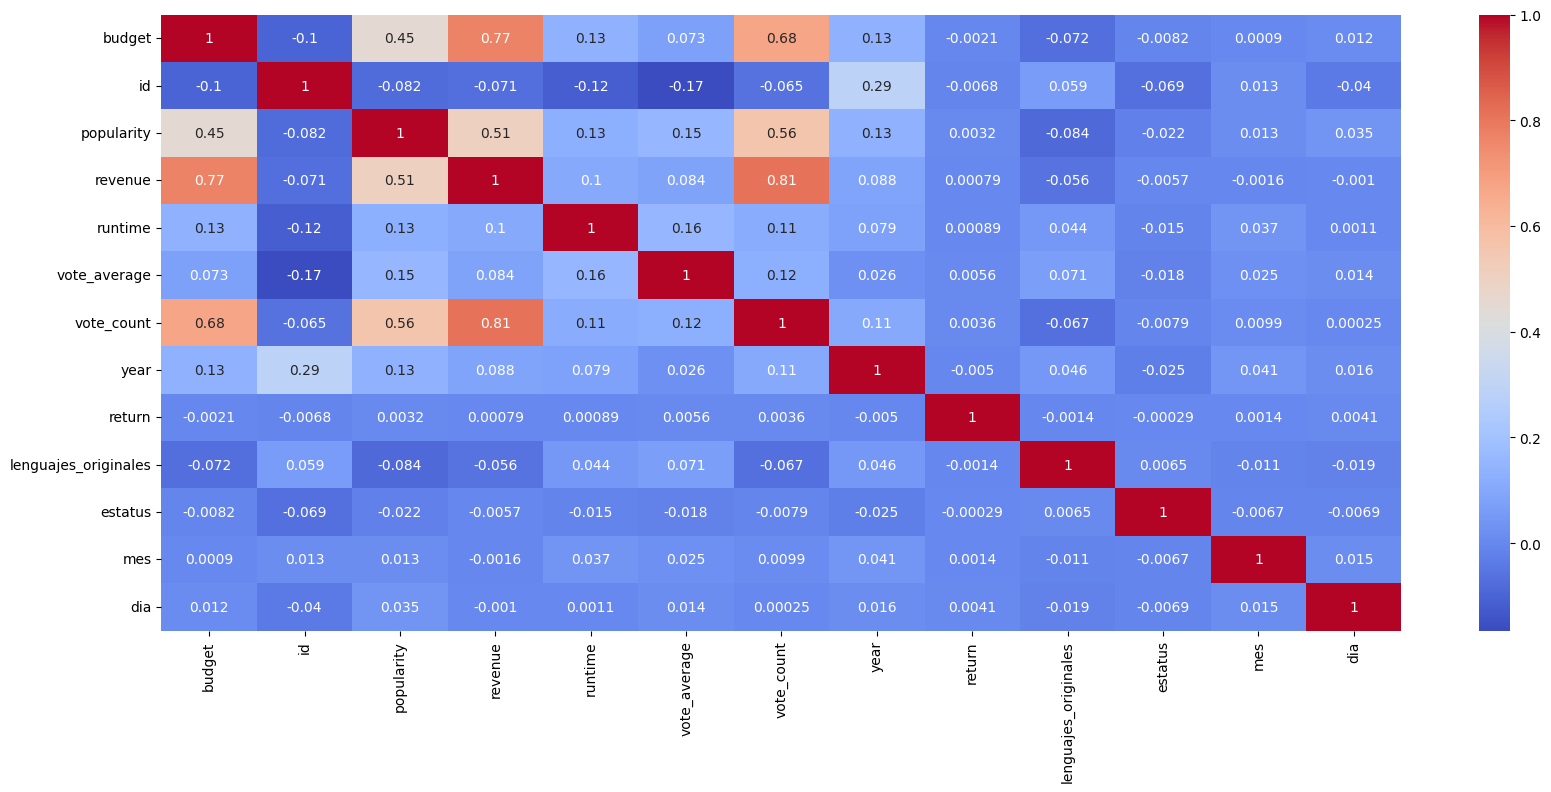

In [92]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_movies_modified2.corr(), annot=True, cmap='coolwarm')

Del mapa de calor con la coorrelación de las variables que se pudieron cambiar a número, ya sea entero o de punto flotante, se puede ver que hay una buena correlación entre las siguientes parejas:

* Revenue y Vote_count
* Revenue y budget
* Vote_count y Budget

Otros que también tienen una buena coorrelación pero no tan buena como las anteriores paerejas, son:

* Popularity y Budget
* Popularity y Revenue

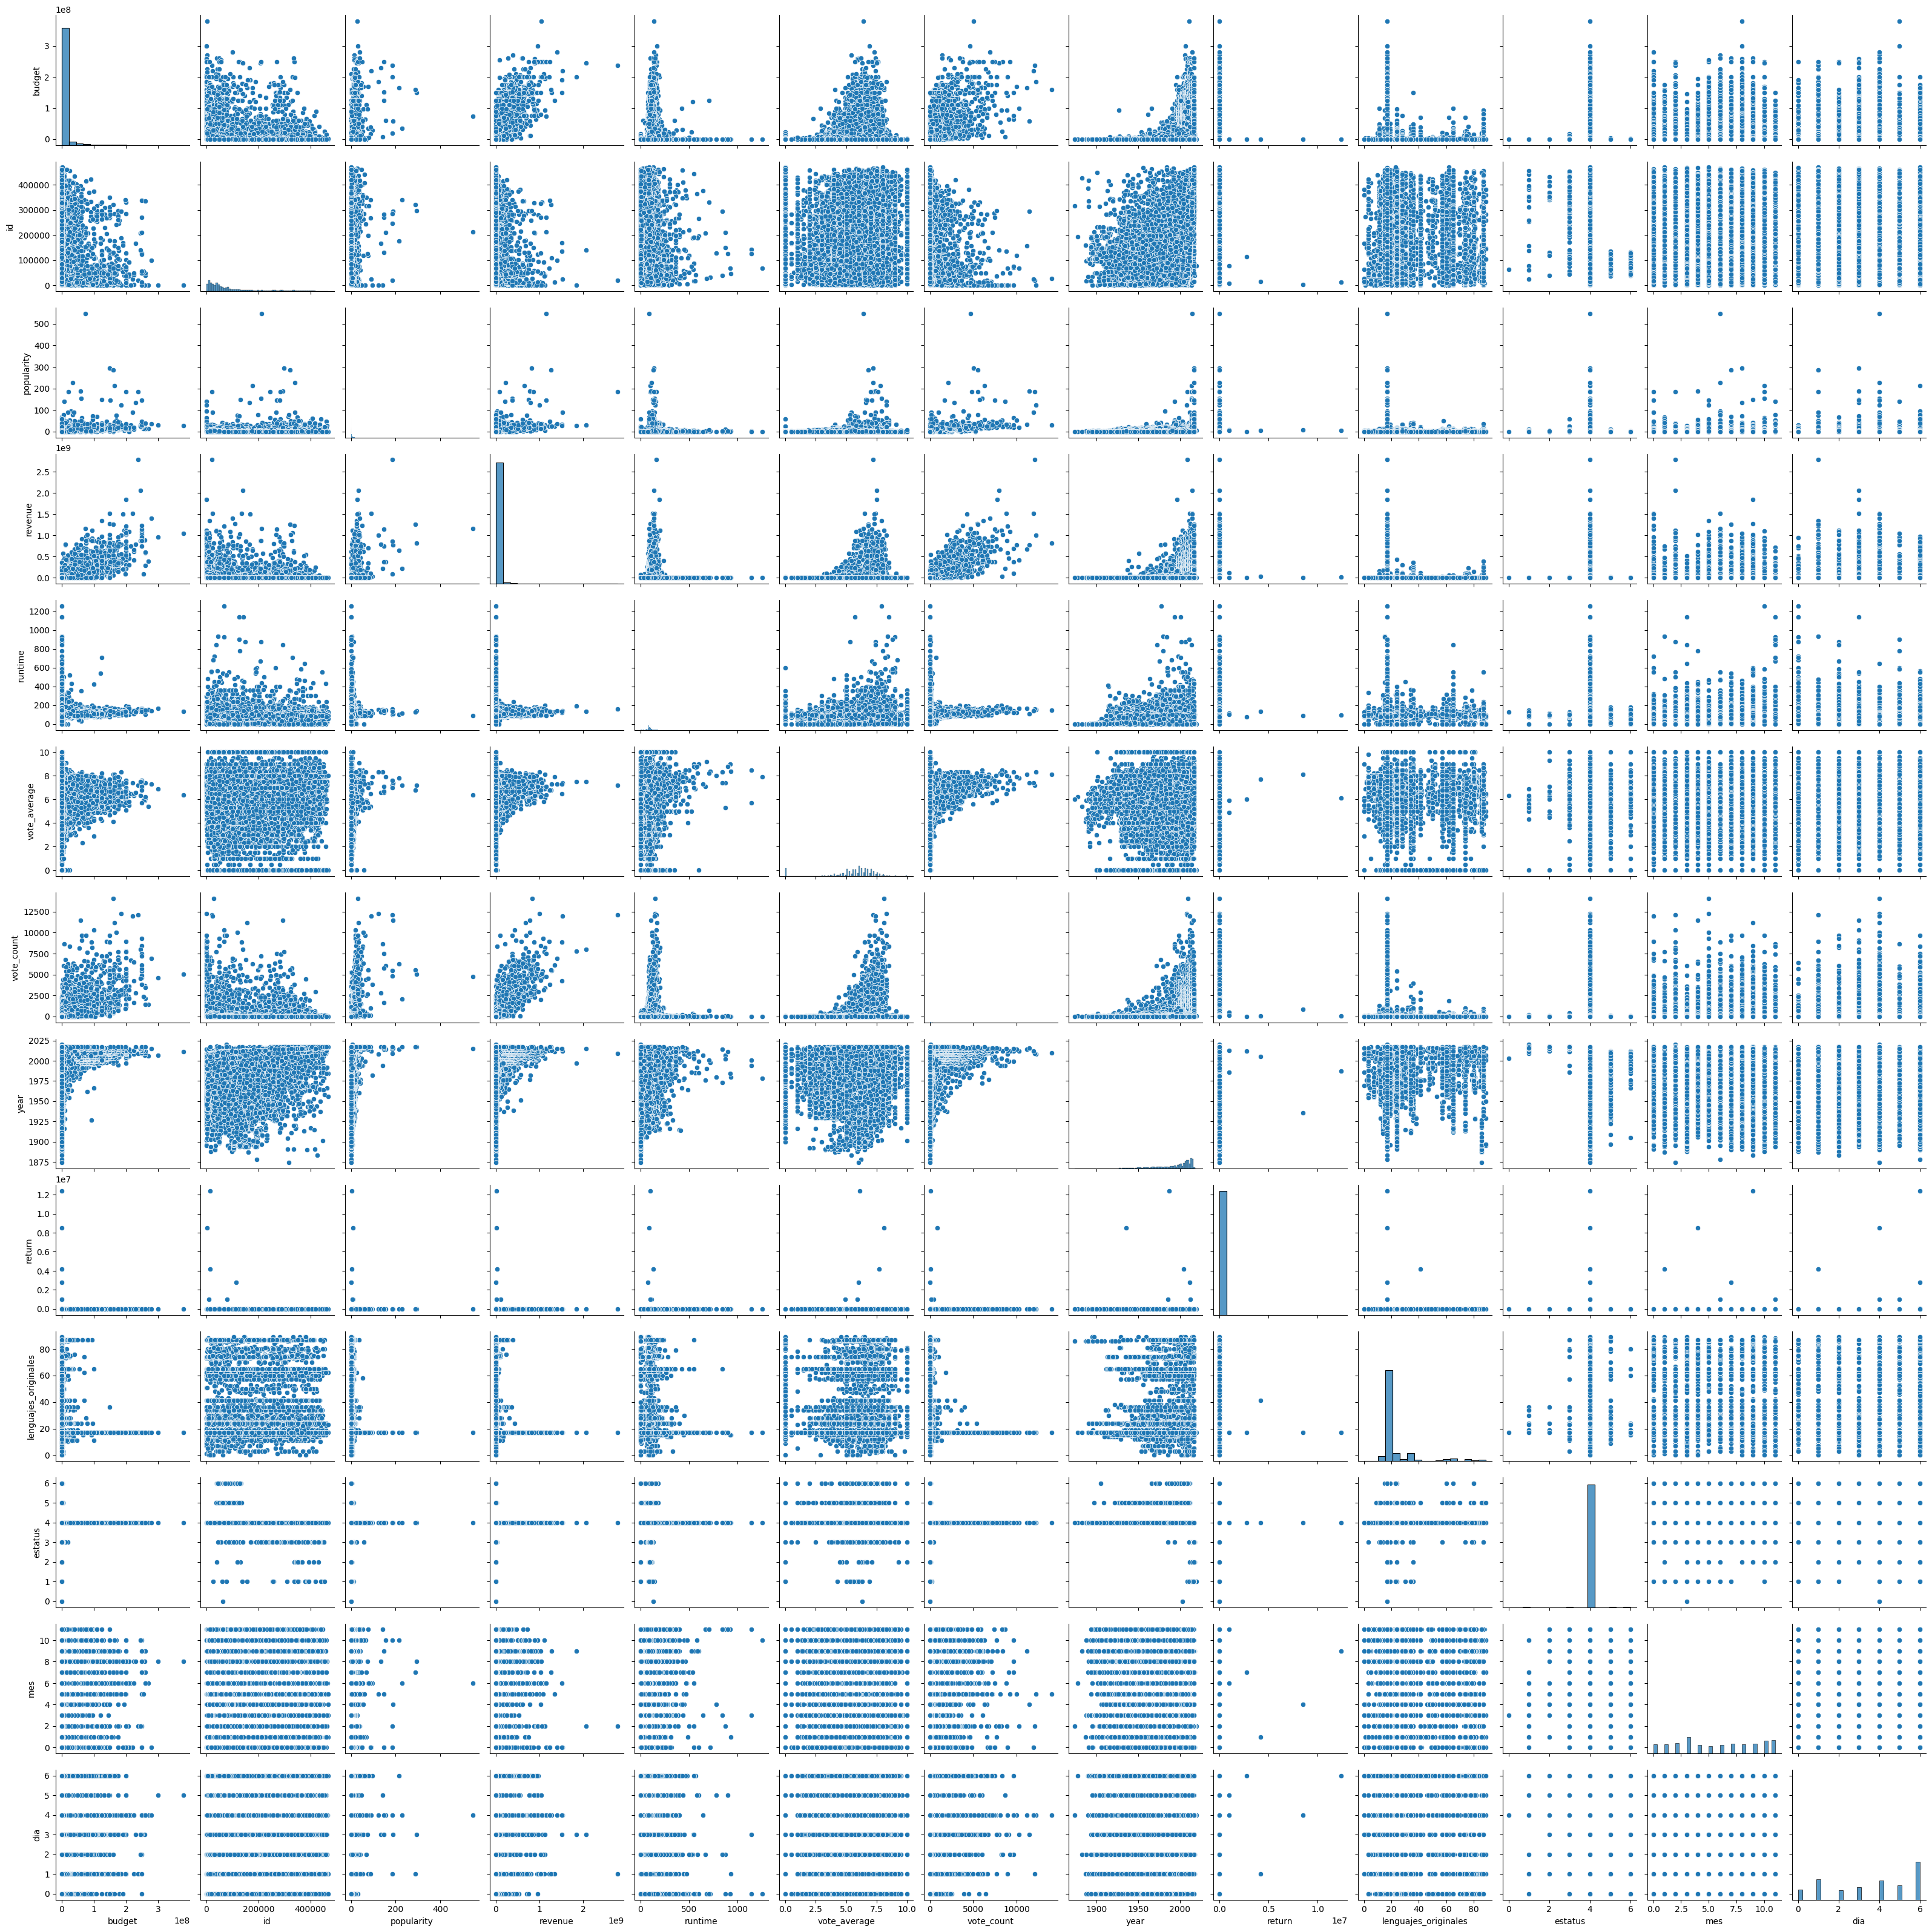

In [93]:
sns.pairplot(df_movies_modified2)

De la imagen anterior solo se puede evidenciar que hay un crecimiento exponencial en algunas característica al paso de los años. Estas características son:

* Budget
* Popularity
* Revenue
* Vote_count

También se puede evidenciar que hay sesgos hacía la izquierda en la características Budget, Popularity, Revenue y Vote_count, a medida que la característica Vote_average incrementa.

## Nubes de palabras

In [94]:
df_movies_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45346 non-null  int64  
 2   genres                 45346 non-null  object 
 3   id                     45346 non-null  int64  
 4   original_language      45335 non-null  object 
 5   overview               44405 non-null  object 
 6   popularity             45346 non-null  float64
 7   production_companies   45346 non-null  object 
 8   production_countries   45346 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45346 non-null  float64
 11  runtime                45100 non-null  float64
 12  spoken_languages       45346 non-null  object 
 13  status                 45266 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

In [95]:
df_movies_wordcloud = df_movies_modified[['overview', 'tagline', 'title', 'generos', 'productoras', 'paises']]
df_movies_wordcloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   overview     44405 non-null  object
 1   tagline      20387 non-null  object
 2   title        45346 non-null  object
 3   generos      45346 non-null  object
 4   productoras  45346 non-null  object
 5   paises       45346 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [96]:
print("Hay valores nulos en la columna de overview?", df_movies_wordcloud['overview'].isnull().any())
print("Hay valores nulos en la columna de tagline?", df_movies_wordcloud['tagline'].isnull().any())
print("Hay valores nulos en la columna de title?", df_movies_wordcloud['title'].isnull().any())
print("Hay valores nulos en la columna de generos?", df_movies_wordcloud['generos'].isnull().any())
print("Hay valores nulos en la columna de productoras?", df_movies_wordcloud['productoras'].isnull().any())
print("Hay valores nulos en la columna de paises?", df_movies_wordcloud['paises'].isnull().any())

Hay valores nulos en la columna de overview? True
Hay valores nulos en la columna de tagline? True
Hay valores nulos en la columna de title? False
Hay valores nulos en la columna de generos? False
Hay valores nulos en la columna de productoras? False
Hay valores nulos en la columna de paises? False


In [97]:
df_movies_wordcloud['overview'] = df_movies_wordcloud['overview'].fillna('')
df_movies_wordcloud['tagline'] = df_movies_wordcloud['tagline'].fillna('')
#df_movies_wordcloud['title'] = df_movies_wordcloud['title'].fillna('')
#df_movies_wordcloud['generos'] = df_movies_wordcloud['generos'].fillna('')
#df_movies_wordcloud['productoras'] = df_movies_wordcloud['productoras'].fillna('')
#df_movies_wordcloud['paises'] = df_movies_wordcloud['paises'].fillna('')

C:\Users\javig\AppData\Local\Temp\ipykernel_51040\3173649266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_wordcloud['overview'] = df_movies_wordcloud['overview'].fillna('')
C:\Users\javig\AppData\Local\Temp\ipykernel_51040\3173649266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_wordcloud['tagline'] = df_movies_wordcloud['tagline'].fillna('')


In [98]:
paises_concatenados = ''

for i in range(len(df_movies_wordcloud['paises'])):
    if len(df_movies_wordcloud['paises'][i]) > 1:
        paises_concatenados = ', '.join(df_movies_wordcloud['paises'][i])
        print(paises_concatenados)
        paises_concatenados = ''
        #for j in range(len(df_movies_wordcloud['paises'][i])):
        #    paises_concatenados += df_movies_wordcloud['paises'][i][j] + ' '

Germany, United States of America
United Kingdom, United States of America
France, United States of America
France, Germany, Italy, United States of America
France, United States of America
United Kingdom, United States of America
France, United States of America
United Kingdom, France
France, Germany, Spain
China, France
France, United States of America
Australia, United States of America
France, United Kingdom
United States of America, United Kingdom
United Kingdom, United States of America
Italy, France, Switzerland
France, United States of America
Belgium, France, Italy
Canada, Japan, United States of America
Germany, United States of America
Netherlands, United Kingdom, Belgium
United Kingdom, United States of America
United Kingdom, Canada, United States of America, Germany
Canada, United Kingdom
United Kingdom, United States of America, Netherlands
Germany, France, United Kingdom
Germany, United States of America
Tunisia, France
United Kingdom, United States of America, France, 

In [99]:
lista_paises = []
paises_concatenados = ''

for i in range(len(df_movies_wordcloud['paises'])):
    if len(df_movies_wordcloud['paises'][i]) == 1:
        lista_paises.append(df_movies_wordcloud['paises'][i][0])
    else:
        paises_concatenados = ', '.join(df_movies_wordcloud['paises'][i])
        lista_paises.append(paises_concatenados)
        paises_concatenados = ''

lista_paises

['United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'Germany, United States of America',
 'United States of America',
 'United States of America',
 'United Kingdom, United States of America',
 'United States of America',
 'France, United States of America',
 'United States of America',
 'United States of America',
 'France, Germany, Italy, United States of America',
 'France, United States of America',
 'United Kingdom, United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'France, United States of America',
 'United States of America',
 'United States of America',
 'Italy',
 'United States of America',
 'United Kingdom, France',
 'France, Germany, Spain',
 'China, France',
 'United States of America',
 'United States of America',
 'France, United 

In [100]:
texto_paises = ' '.join(lista_paises)

In [101]:
lista_generos = []
generos_concatenados = ''

for i in range(len(df_movies_wordcloud['generos'])):
    if len(df_movies_wordcloud['generos'][i]) == 1:
        lista_generos.append(df_movies_wordcloud['generos'][i][0])
    else:
        generos_concatenados = ', '.join(df_movies_wordcloud['generos'][i])
        lista_generos.append(generos_concatenados)
        generos_concatenados = ''

lista_generos

['Animation, Comedy, Family',
 'Adventure, Fantasy, Family',
 'Romance, Comedy',
 'Comedy, Drama, Romance',
 'Comedy',
 'Action, Crime, Drama, Thriller',
 'Comedy, Romance',
 'Action, Adventure, Drama, Family',
 'Action, Adventure, Thriller',
 'Adventure, Action, Thriller',
 'Comedy, Drama, Romance',
 'Comedy, Horror',
 'Family, Animation, Adventure',
 'History, Drama',
 'Action, Adventure',
 'Drama, Crime',
 'Drama, Romance',
 'Crime, Comedy',
 'Crime, Comedy, Adventure',
 'Action, Comedy, Crime',
 'Comedy, Thriller, Crime',
 'Drama, Thriller',
 'Action, Adventure, Crime, Thriller',
 'Drama, Fantasy, Science Fiction, Thriller',
 'Drama, Romance',
 'Drama',
 'Comedy, Drama, Family',
 'Drama, Romance',
 'Fantasy, Science Fiction, Adventure',
 'Drama, Crime',
 'Drama, Crime',
 'Science Fiction, Thriller, Mystery',
 'Romance, Adventure',
 'Fantasy, Drama, Comedy, Family',
 'History, Drama, Romance',
 'Drama',
 'Adventure, History, Drama, Family',
 'Comedy, Family, Romance',
 'Comedy, Dram

In [102]:
texto_generos = ' '.join(lista_generos)

In [103]:
lista_productoras = []
productoras_concatenadas = ''

for i in range(len(df_movies_wordcloud['productoras'])):
    if len(df_movies_wordcloud['productoras'][i]) == 1:
        lista_productoras.append(df_movies_wordcloud['productoras'][i][0])
    else:
        productoras_concatenadas = ', '.join(df_movies_wordcloud['productoras'][i])
        lista_productoras.append(productoras_concatenadas)
        productoras_concatenadas = ''

lista_productoras

['Pixar Animation Studios',
 'TriStar Pictures, Teitler Film, Interscope Communications',
 'Warner Bros., Lancaster Gate',
 'Twentieth Century Fox Film Corporation',
 'Sandollar Productions, Touchstone Pictures',
 'Regency Enterprises, Forward Pass, Warner Bros.',
 'Paramount Pictures, Scott Rudin Productions, Mirage Enterprises, Sandollar Productions, Constellation Entertainment, Worldwide, Mont Blanc Entertainment GmbH',
 'Walt Disney Pictures',
 'Universal Pictures, Imperial Entertainment, Signature Entertainment',
 'United Artists, Eon Productions',
 'Columbia Pictures, Castle Rock Entertainment',
 'Columbia Pictures, Castle Rock Entertainment, Enigma Pictures',
 'Universal Pictures, Amblin Entertainment, Amblimation',
 'Hollywood Pictures, Cinergi Pictures Entertainment',
 'Le Studio Canal+, Laurence Mark Productions, Metro-Goldwyn-Mayer (MGM), Carolco Pictures',
 'Universal Pictures, Légende Entreprises, Syalis DA, De Fina-Cappa',
 'Columbia Pictures Corporation, Mirage Enterpris

In [104]:
texto_prductoras = ' '.join(lista_productoras)

In [105]:
texto_concatenado_todo = df_movies_wordcloud['overview'] + ', ' + df_movies_wordcloud['tagline'] + ', ' + df_movies_wordcloud['title'] + ', ' + lista_generos + ', ' + lista_productoras + ', ' + lista_paises
texto_concatenado_todo[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences., , Toy Story, Animation, Comedy, Family, Pixar Animation Studios, United States of America"

In [106]:
texto_final_todo = ''.join(texto_concatenado_todo)
texto_final_todo[0:1000]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences., , Toy Story, Animation, Comedy, Family, Pixar Animation Studios, United States of AmericaWhen siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures., Roll the dice and unleash the excitement!, Jumanji, Adventure, Fantasy, Family, TriStar Pictures, Teitler Film, Interscope Communications, United States of AmericaA family wedding reignites the ancient feud b

In [107]:
nube_palabras_todo = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 800, height = 400).generate(texto_final_todo)

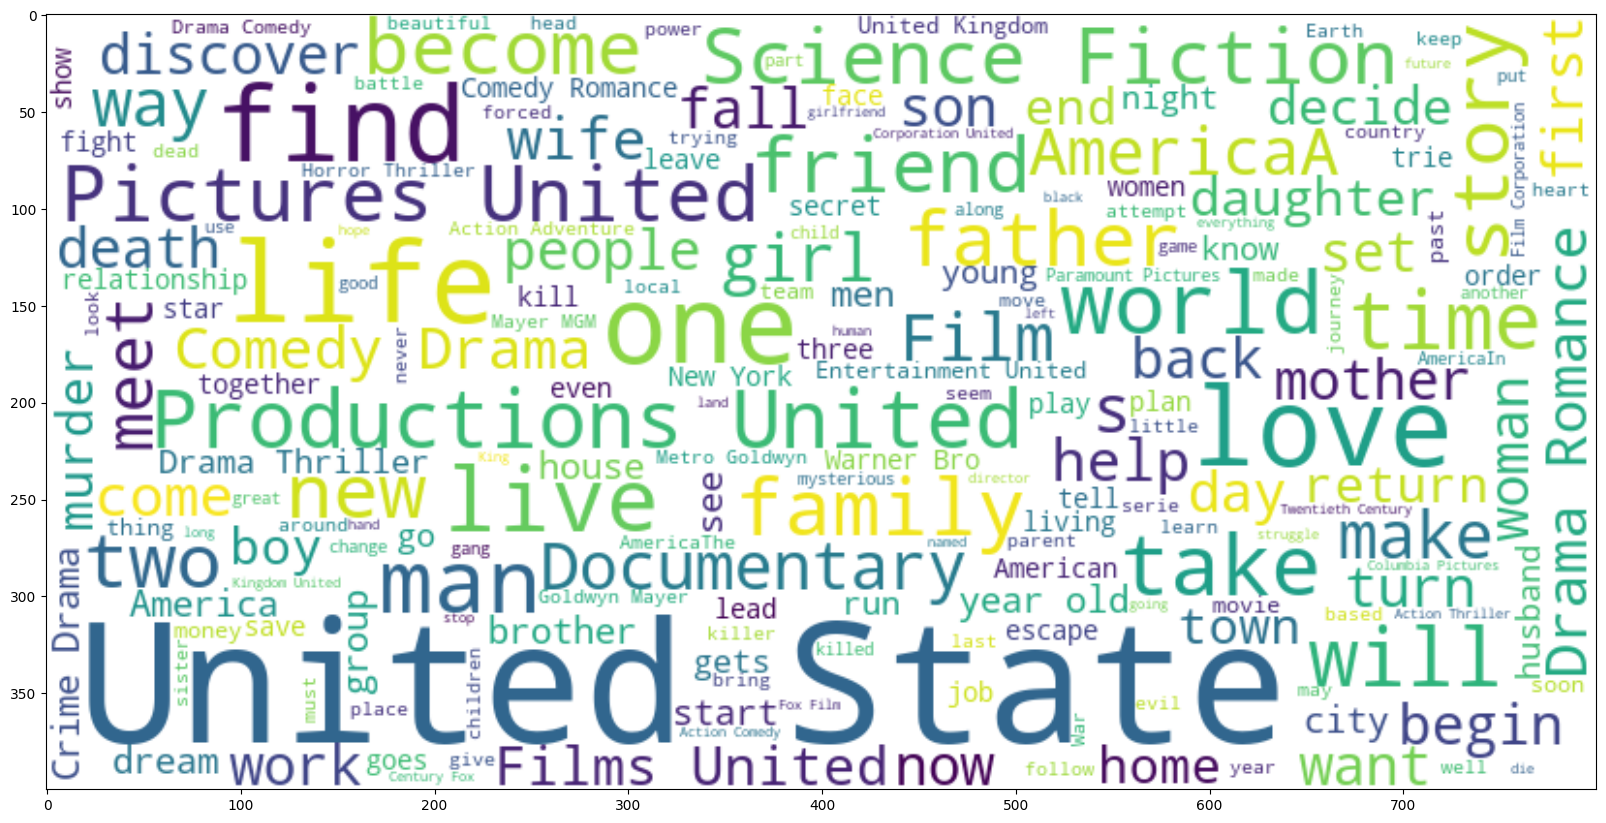

In [108]:
plt.figure(figsize=(20, 20))
plt.imshow(nube_palabras_todo, interpolation='bilinear')

De la anterior nube de palabras se puede ver que hay diversas palabras, pero sobre todo se ve bastante el país de Estados Unidos, alguna productora como Productions United y después si se pueden ver palabras clave como life, find, world, man, father, entre muchas otras.

In [109]:
texto_concatenado_parte1 = df_movies_wordcloud['overview'] + ', ' + df_movies_wordcloud['tagline'] + ', ' + df_movies_wordcloud['title'] + ', ' + lista_generos + '. '
texto_concatenado_parte1[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences., , Toy Story, Animation, Comedy, Family. "

In [110]:
texto_final_parte1 = ''.join(texto_concatenado_parte1)
texto_final_parte1[0:1000]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences., , Toy Story, Animation, Comedy, Family. When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures., Roll the dice and unleash the excitement!, Jumanji, Adventure, Fantasy, Family. A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local ba

In [111]:
nube_palabras_parte1 = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 800, height = 400).generate(texto_final_parte1)

In [112]:
nube_palabras_parte1.words_

{'life': 1.0,
 'one': 0.9151549778603056,
 'love': 0.9124410798457363,
 'find': 0.8614483645193544,
 'man': 0.6200542779602913,
 'live': 0.6016283388087416,
 'world': 0.5934866447650335,
 'family': 0.5743465219254392,
 'story': 0.5607770318525925,
 'Documentary': 0.5547778888730182,
 'take': 0.5506356234823596,
 'film': 0.5267818883016712,
 'will': 0.5084987858877303,
 'time': 0.5012141122696757,
 'new': 0.4557920297100414,
 'father': 0.4535066419082988,
 'Science Fiction': 0.4456506213398086,
 'friend': 0.44079417226110557,
 'become': 0.4405084987858877,
 'make': 0.4260819882873875,
 'two': 0.42222539637194684,
 'way': 0.4136551921154121,
 'meet': 0.40451364090844166,
 'girl': 0.39665762033995144,
 's': 0.39251535494929296,
 'Comedy Drama': 0.3752321096986145,
 'help': 0.3749464362233967,
 'Drama Romance': 0.37166119125839164,
 'wife': 0.3688044565062134,
 'come': 0.35509212969575776,
 'woman': 0.349807170404228,
 'now': 0.3405227824596486,
 'begin': 0.3390944150835595,
 'work': 0.334

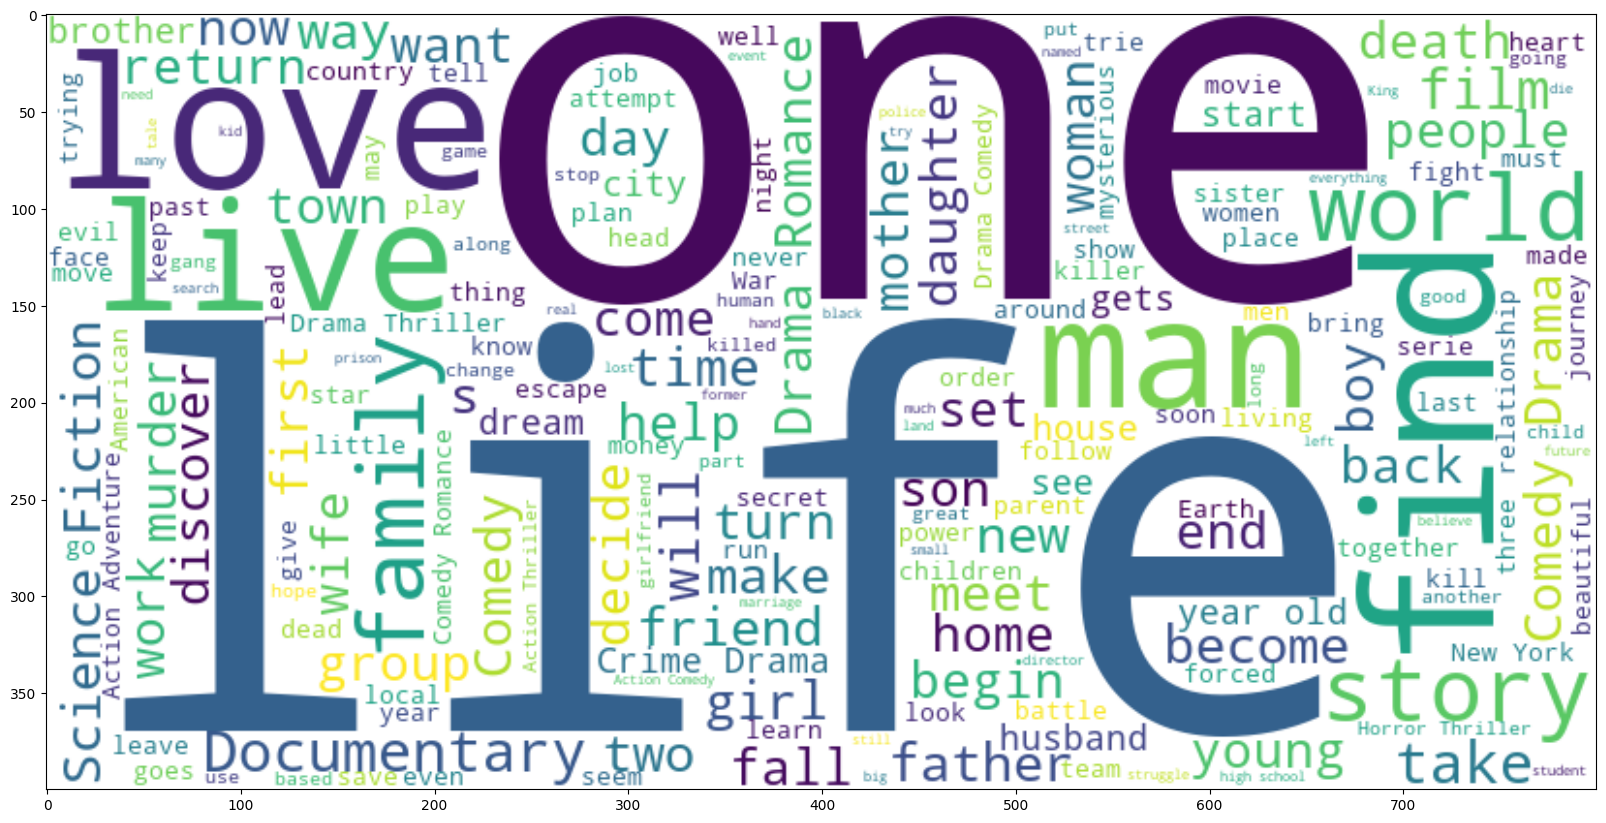

In [113]:
plt.figure(figsize=(20, 20))
plt.imshow(nube_palabras_parte1, interpolation='bilinear')

En esta nube de palabras se evidencia que ya hay palabras más repetitivas como one, life, love, world, find, live, family, man, entre otras.

Se evidencia que quitando a los paises y las productoras se tienen más palabras de los resumenes, de los generos y de posiblemente los titulos.

In [114]:
texto_concatenado_parte2 = df_movies_wordcloud['overview'] + ', ' + df_movies_wordcloud['tagline'] + ', ' + df_movies_wordcloud['title'] + '. '
texto_concatenado_parte2[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences., , Toy Story. "

In [115]:
texto_final_parte2 = ''.join(texto_concatenado_parte2)
texto_final_parte2[0:1000]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences., , Toy Story. When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures., Roll the dice and unleash the excitement!, Jumanji. A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the

In [116]:
nube_palabras_parte2 = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 800, height = 400).generate(texto_final_parte2)

In [119]:
nube_palabras_parte2.words_.keys()

dict_keys(['life', 'one', 'love', 'find', 'man', 'live', 'world', 'family', 'story', 'take', 'will', 'film', 'time', 'two', 'new', 'father', 'friend', 'become', 'make', 'way', 'meet', 'girl', 's', 'help', 'wife', 'set', 'come', 'woman', 'now', 'begin', 'young', 'work', 'fall', 'day', 'death', 'mother', 'son', 'discover', 'back', 'want', 'people', 'first', 'turn', 'daughter', 'decide', 'group', 'murder', 'home', 'end', 'boy', 'town', 'return', 'year old', 'movie', 'brother', 'dream', 'house', 'start', 'see', 'gets', 'city', 'husband', 'night', 'go', 'men', 'three', 'run', 'American', 'know', 'New York', 'secret', 'play', 'tell', 'job', 'trie', 'escape', 'relationship', 'leave', 'kill', 'face', 'save', 'order', 'soon', 'even', 'fight', 'lead', 'goes', 'together', 'women', 'plan', 'living', 'based', 'star', 'show', 'war', 'dead', 'past', 'thing', 'money', 'team', 'little', 'sister', 'must', 'journey', 'children', 'well', 'follow', 'attempt', 'made', 'look', 'local', 'adventure', 'year', '

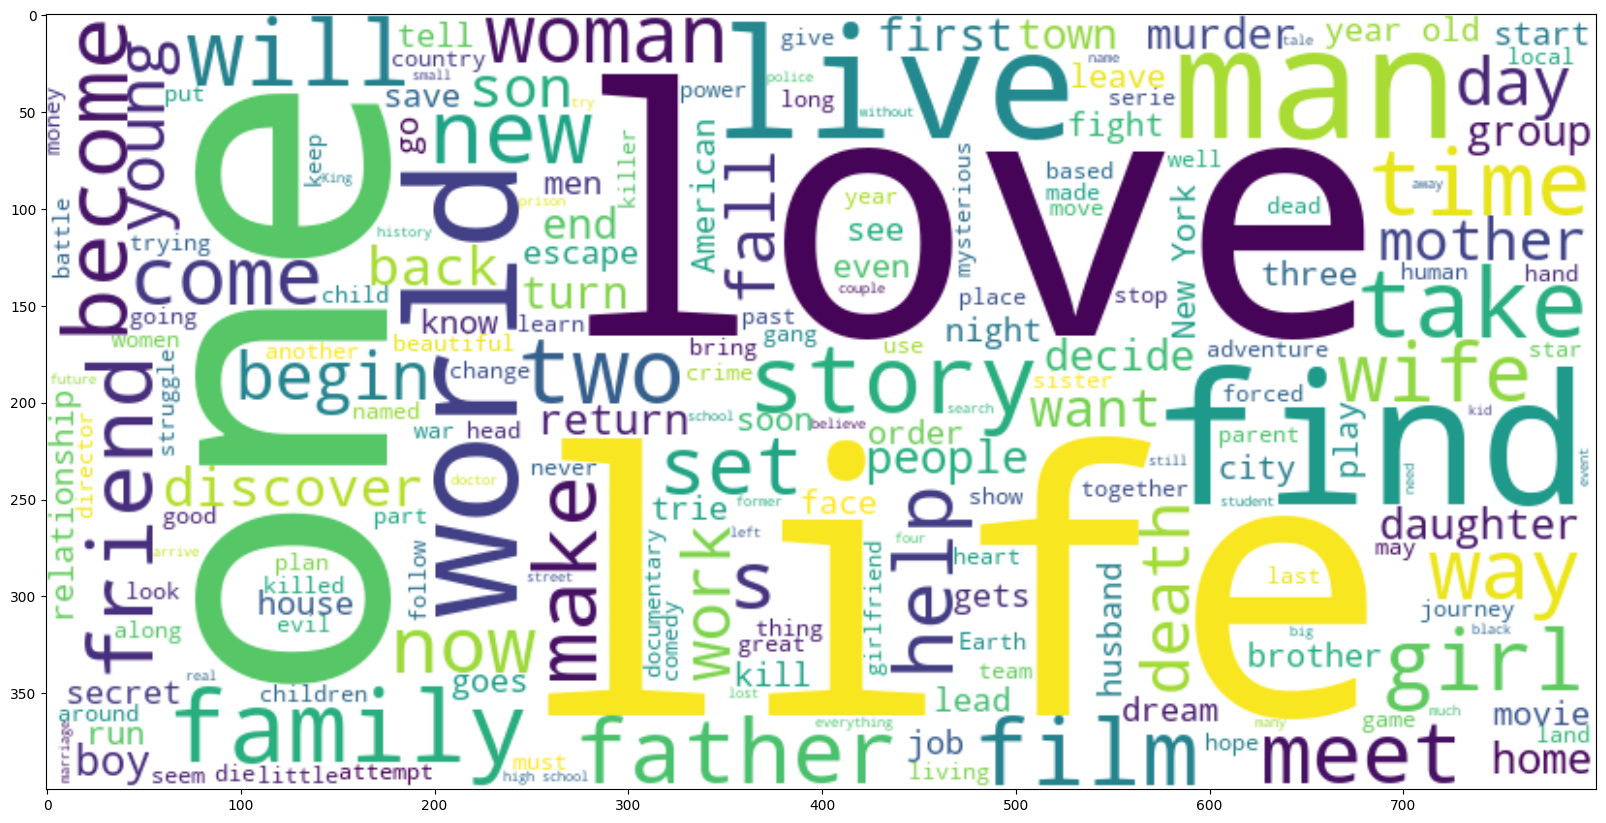

In [117]:
plt.figure(figsize=(20, 20))
plt.imshow(nube_palabras_parte2, interpolation='bilinear')

En esta nube de palabras ya solo estan los resumenes o prologos (overview), los tagline y los titulos de las peliculas.

Se puede evidenciar que las palabras one, life, love, world, find, live, family, man que eran bastante visibles en la anterior nube de palabras ahora son mucho más grandes y que logran crecer algunas otras palabras para ser más visibles.